# Анализ убытков приложения ProcrastinatePRO+

# Описание проекта

Я, маркетолог-аналитик провожу продуктовое исследование развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Моя задача — разобраться в причинах и помочь компании выйти в плюс.

**Проведен анализ данных от ProcrastinatePRO+.**

**Рассчитаны различные метрики, использован когортный анализ: LTV, CAC, Retention rate, DAU, WAU, MAU и т.д. Использованы функции расчёта метрик. Сделаны выводы по полученным данным.**

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

Мне предстоит изучить:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

Описание данных

Будет исследовано три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-их-подготовка-к-анализу" data-toc-modified-id="Загрузка-данных-и-их-подготовка-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и их подготовка к анализу</a></span><ul class="toc-item"><li><span><a href="#Импорт-данных-и-основных-библиотек-для-анализа" data-toc-modified-id="Импорт-данных-и-основных-библиотек-для-анализа-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт данных и основных библиотек для анализа</a></span></li><li><span><a href="#Вывод-общей-информации,-поиск-пропусков-и-явных-дубликатов" data-toc-modified-id="Вывод-общей-информации,-поиск-пропусков-и-явных-дубликатов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод общей информации, поиск пропусков и явных дубликатов</a></span></li><li><span><a href="#Преобразование-данных-в-столбцах" data-toc-modified-id="Преобразование-данных-в-столбцах-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Преобразование данных в столбцах</a></span></li><li><span><a href="#Проверка-данных-на-неявные-дубликаты" data-toc-modified-id="Проверка-данных-на-неявные-дубликаты-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка данных на неявные дубликаты</a></span></li></ul></li><li><span><a href="#Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Функции для расчёта и анализа LTV, ROI, удержания и конверсии.</a></span><ul class="toc-item"><li><span><a href="#Функции-для-вычисления-метрик" data-toc-modified-id="Функции-для-вычисления-метрик-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Функции для вычисления метрик</a></span></li><li><span><a href="#Функции-для-визуализации-данных" data-toc-modified-id="Функции-для-визуализации-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Функции для визуализации данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Составляем-профили-пользователей" data-toc-modified-id="Составляем-профили-пользователей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Составляем профили пользователей</a></span></li><li><span><a href="#Платящие-клиенты-в-разрезе-стран" data-toc-modified-id="Платящие-клиенты-в-разрезе-стран-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Платящие клиенты в разрезе стран</a></span></li><li><span><a href="#Платящие-клиенты-в-разрезе-девайсов" data-toc-modified-id="Платящие-клиенты-в-разрезе-девайсов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Платящие клиенты в разрезе девайсов</a></span></li><li><span><a href="#Платящие-клиенты-в-разрезе-каналов-привлечения" data-toc-modified-id="Платящие-клиенты-в-разрезе-каналов-привлечения-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Платящие клиенты в разрезе каналов привлечения</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Общая-сумма-расходов-на-маркетинг" data-toc-modified-id="Общая-сумма-расходов-на-маркетинг-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общая сумма расходов на маркетинг</a></span></li><li><span><a href="#Сумма-расходов-на-маркетинг-в-разрезе-каналов-привлечения" data-toc-modified-id="Сумма-расходов-на-маркетинг-в-разрезе-каналов-привлечения-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Сумма расходов на маркетинг в разрезе каналов привлечения</a></span></li><li><span><a href="#Динамика-изменения-расходов-на-маркетинг-в-разрезе-каналов-привлечения-по-месяцам-и-неделям" data-toc-modified-id="Динамика-изменения-расходов-на-маркетинг-в-разрезе-каналов-привлечения-по-месяцам-и-неделям-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Динамика изменения расходов на маркетинг в разрезе каналов привлечения по месяцам и неделям</a></span></li><li><span><a href="#Средняя-стоимость-привлечения-одного-пльзователя-(CAC)" data-toc-modified-id="Средняя-стоимость-привлечения-одного-пльзователя-(CAC)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Средняя стоимость привлечения одного пльзователя (CAC)</a></span></li></ul></li><li><span><a href="#Оценка-окупаемости-рекламы" data-toc-modified-id="Оценка-окупаемости-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка окупаемости рекламы</a></span><ul class="toc-item"><li><span><a href="#Анализ-общей-окупаемости-рекламы" data-toc-modified-id="Анализ-общей-окупаемости-рекламы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ общей окупаемости рекламы</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-устройствам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-устройствам-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по устройствам</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-странам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-странам-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по странам</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-каналам-привлечения" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-каналам-привлечения-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по каналам привлечения</a></span></li><li><span><a href="#Анализ-удержания-с-разбивкой-по-регионам" data-toc-modified-id="Анализ-удержания-с-разбивкой-по-регионам-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Анализ удержания с разбивкой по регионам</a></span></li><li><span><a href="#Анализ-удержания-с-разбивкой-по-каналам" data-toc-modified-id="Анализ-удержания-с-разбивкой-по-каналам-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Анализ удержания с разбивкой по каналам</a></span></li><li><span><a href="#Анализ-удержания-с-разбивкой-по-устройствам" data-toc-modified-id="Анализ-удержания-с-разбивкой-по-устройствам-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Анализ удержания с разбивкой по устройствам</a></span></li><li><span><a href="#Анализ-окупаемости-по-каналам-и-девайсам-в-США" data-toc-modified-id="Анализ-окупаемости-по-каналам-и-девайсам-в-США-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Анализ окупаемости по каналам и девайсам в США</a></span></li><li><span><a href="#Анализ-удержания-и-конверсии-по-каналам-и-девайсам-в-США" data-toc-modified-id="Анализ-удержания-и-конверсии-по-каналам-и-девайсам-в-США-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Анализ удержания и конверсии по каналам и девайсам в США</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

### Загрузка данных и их подготовка к анализу

#### Импорт данных и основных библиотек для анализа

In [1]:
# импортируем основные библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
#код, который выводит все колонки таблицы
pd.set_option('display.max_columns', None)
#отображение float с двумя знаками после точки
pd.options.display.float_format = '{:.2f}'.format

#загружаем данные
visits, orders, costs = (
    pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv', parse_dates=['Session Start','Session End'], dayfirst=True), #  журнал сессий
    pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv', parse_dates=['Event Dt'], dayfirst=True), # заказы
    pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv') # расходы на рекламу
)

#### Вывод общей информации, поиск пропусков и явных дубликатов

In [2]:
# Напишем функцию для вывода основной информации по датасету
def get_info(dataset):
    print('Общая информация:')
    print()
    dataset.info()
    print('*'*50)
    print('Количество пропусков:')
    print()
    print(dataset.isna().sum())
    print('*'*50)
    print('Вывод первых 2х строк данных:')
    print()
    print(dataset.head(2))
    print('*'*50)
    print('Количество явных дубликатов:')
    print(dataset.duplicated().sum())
    

In [3]:
get_info(visits)

Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
**************************************************
Количество пропусков:

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64
**************************************************
Вывод первых 2х строк данных:

        User Id         Region  Device  Channel       Session Start  \
0  981449118918  United States 

In [4]:
get_info(orders)

Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB
**************************************************
Количество пропусков:

User Id     0
Event Dt    0
Revenue     0
dtype: int64
**************************************************
Вывод первых 2х строк данных:

        User Id            Event Dt  Revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
**************************************************
Количество явных дубликатов:
0


In [5]:
get_info(costs)

Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
**************************************************
Количество пропусков:

dt         0
Channel    0
costs      0
dtype: int64
**************************************************
Вывод первых 2х строк данных:

           dt   Channel  costs
0  2019-05-01  FaceBoom 113.30
1  2019-05-02  FaceBoom  78.10
**************************************************
Количество явных дубликатов:
0


In [6]:
# Приведем названия всех столбцов в датасетах к нижнему регистру, а также
#заменим пробел на нижнее подчеркивание, чтобы добиться 
#единообразия в названии столбцов
datasets = [visits,orders,costs]

for dataset in datasets:
    dataset.columns = [x.lower().replace(' ', '_') for x in dataset.columns]

In [7]:
visits.head()

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

#### Преобразование данных в столбцах

Пропусков в значениях и явных дубликатов нет, необходимо только изменить тип даных у столбцов с датами.

In [8]:
# преобразование данных о времени
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#### Проверка данных на неявные дубликаты

In [9]:
#напишем функцию для поиска неявных дубликатов среди
#столбцов с именами собственными

def get_unique(columns,dataset):
    for column in columns:
        print(column)
        print(dataset[column].unique())

In [10]:
#запишем названия колонок в именованные списки
columns_visits_for_research = ['region','device','channel']
columns_costs_for_research = ['channel']

In [11]:
#вызовем функцию в датасету visits
get_unique(columns_visits_for_research, visits)

region
['United States' 'UK' 'France' 'Germany']
device
['iPhone' 'Mac' 'Android' 'PC']
channel
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


In [12]:
#вызовем функцию в датасету costs
get_unique(columns_costs_for_research, costs)

channel
['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


Неявные дубликаты не найдены.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функции для вычисления метрик

In [13]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [16]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функции для визуализации данных

In [17]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [18]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [19]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [20]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

#### Составляем профили пользователей

In [21]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt               month  payer  acquisition_cost  
0  2019-05-07 2019-05-07 20:58:57   True              1.09  
1  2019-07-09 2019-07-09 12:46:07  False              1.11  
2  2019-10-01 2019-10-01 09:58:33  False              0.00  
3  2019-08-22 2019-08-22 21:35:48  False              0.99  
4  2019-10-02 2019-10-02 00:07:44  False              0.23

In [22]:
# Выясним минимальную и максимальную даты привлечения пользователей
profiles['dt'].min() , profiles['dt'].max()

(datetime.date(2019, 5, 1), datetime.date(2019, 10, 27))

Минимальная и максимальная даты совпадают с границами периода оговоренного с отделом маркетинга для анализа.

In [23]:
observation_date = datetime(2019,11,1).date() #момент анализа

horizon_days = 14 #горизонт анализа

ignore_horizon = False

# максимально возможная дата привлечения с учётом горизонта
max_analysis_date= observation_date - timedelta(days=horizon_days-1)
max_analysis_date

datetime.date(2019, 10, 19)

#### Платящие клиенты в разрезе стран

In [24]:
# Посмотрим на количество платящих пользователей по странам
users_by_country_payer = (profiles.query('payer==True')
    .groupby('region')
    .agg({'payer':'count'})
    .sort_values(by='payer',ascending=False)
    .reset_index()
)
#Общее количество пользователей по странам
users_by_country_all = (profiles
    .groupby('region')
    .agg({'user_id':'count'})
    .sort_values(by='user_id',ascending=False)
    .reset_index()
)

#Объединим таблицы
users_by_country_payer = (users_by_country_payer
                          .merge(users_by_country_all, on='region')
                          .rename(columns={'user_id':'all_users'})
)

#Посчитаем долю платящих пользователей от общего количества
users_by_country_payer['payer_percent'] = users_by_country_payer['payer']*100/users_by_country_payer['all_users']

users_by_country_payer

region  payer  all_users  payer_percent
0  United States   6902     100002           6.90
1             UK    700      17575           3.98
2         France    663      17450           3.80
3        Germany    616      14981           4.11

Приложением `Procrastinate Pro+` пользуются жители США, Германии, Франции, Великобритании. В платящих клиентов больше всего конвертивуются пользователи из США - 6,9%, в других странах в районе 4%.

#### Платящие клиенты в разрезе девайсов

In [25]:
users_by_device = (
    profiles.query('payer==True')
    .groupby('device')
    .agg({'payer':'count'})
    .sort_values('payer',ascending=False)
)
users_by_device['percent'] = users_by_device['payer']*100/users_by_device['payer'].sum()
users_by_device

payer  percent
device                 
iPhone    3382    38.08
Android   2050    23.08
Mac       1912    21.53
PC        1537    17.31

Платящие клиенты пользуются IPhone, Android, Mac, PC.

Больше всего клиентов приходит в приложение с IPhone - 38,08%. Практически одинаковое количество платящих пользователей приходит с Android и Mac, 23,08% и 21,53% соответственно. Меньше всего с PC - 17,31%

#### Платящие клиенты в разрезе каналов привлечения

In [26]:
users_by_channel = (
    profiles.query('payer==True')
    .groupby('channel')
    .agg({'payer':'count'})
    .sort_values('payer',ascending=False)
)
users_by_channel['percent'] = users_by_channel['payer']*100/users_by_channel['payer'].sum()
users_by_channel

payer  percent
channel                           
FaceBoom             3557    40.05
TipTop               1878    21.15
organic              1160    13.06
WahooNetBanner        453     5.10
AdNonSense            440     4.95
RocketSuperAds        352     3.96
LeapBob               262     2.95
OppleCreativeMedia    233     2.62
lambdaMediaAds        225     2.53
YRabbit               165     1.86
MediaTornado          156     1.76

In [27]:
users_by_channel_and_country = (
    profiles.query('payer==True')
    .groupby(['region','channel'])
    .agg({'payer':'count'})
    .sort_values('payer',ascending=False)
)
users_by_channel_and_country['percent'] = users_by_channel_and_country['payer']*100/users_by_channel_and_country['payer'].sum()
users_by_channel_and_country

payer  percent
region        channel                           
United States FaceBoom             3557    40.05
              TipTop               1878    21.15
              organic               794     8.94
              RocketSuperAds        352     3.96
              YRabbit               165     1.86
              MediaTornado          156     1.76
UK            WahooNetBanner        153     1.72
France        WahooNetBanner        152     1.71
              AdNonSense            150     1.69
Germany       WahooNetBanner        148     1.67
UK            AdNonSense            148     1.67
Germany       AdNonSense            142     1.60
UK            organic               131     1.48
Germany       organic               126     1.42
France        organic               109     1.23
UK            LeapBob               103     1.16
France        LeapBob                90     1.01
UK            OppleCreativeMedia     89     1.00
France        lambdaMediaAds         82     0.92
              OppleCreativeMedia     80     0.90
UK            lambdaMediaAds         76     0.86
Germany       LeapBob                69     0.78
              lambdaMediaAds         67     0.75
              OppleCreativeMedia     64     0.72

In [28]:
top_3_channel = users_by_channel[:3].sum()
other_channel = users_by_channel[3:].sum()

top_3_channel, other_channel

(payer     6595.00
 percent     74.26
 dtype: float64,
 payer     2286.00
 percent     25.74
 dtype: float64)

Больше всего платящих клиентов приходит из канала `FaceBoom` - 40,05%. На втором месте  `TipTop` - 21,15%, на третьем `organic` - 13,06%. Эти три канала приносят 74,26% платящих клиентов. Из остальных каналов приходит - 25,74% платящих пользователей. 

**Вывод:**
Наиболее привлекательной аудиторией для приложения являются жители США, пользующиеся IPhone и приходящие из канала `FaceBoom`.

### Маркетинг

#### Общая сумма расходов на маркетинг

In [29]:
#общая сумма расходов на маркетинг
round(costs['costs'].sum(),2)

105497.3

#### Сумма расходов на маркетинг в разрезе каналов привлечения

In [30]:
#расходы на маркетинг в разрезе каналов привлечения
(costs
    .groupby('channel')
    .agg({'costs':'sum'})
    .sort_values('costs', ascending=False)
)

costs
channel                    
TipTop             54751.30
FaceBoom           32445.60
WahooNetBanner      5151.00
AdNonSense          3911.25
OppleCreativeMedia  2151.25
RocketSuperAds      1833.00
LeapBob             1797.60
lambdaMediaAds      1557.60
MediaTornado         954.48
YRabbit              944.22

#### Динамика изменения расходов на маркетинг в разрезе каналов привлечения по месяцам и неделям

In [31]:
# получим номер недели и месяца трат на рекламный источник 
costs['month'] = pd.DatetimeIndex(costs['dt']).month

costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs

dt         channel  costs  month  week
0     2019-05-01        FaceBoom 113.30      5    18
1     2019-05-02        FaceBoom  78.10      5    18
2     2019-05-03        FaceBoom  85.80      5    18
3     2019-05-04        FaceBoom 136.40      5    18
4     2019-05-05        FaceBoom 122.10      5    18
...          ...             ...    ...    ...   ...
1795  2019-10-23  lambdaMediaAds   4.00     10    43
1796  2019-10-24  lambdaMediaAds   6.40     10    43
1797  2019-10-25  lambdaMediaAds   8.80     10    43
1798  2019-10-26  lambdaMediaAds   8.80     10    43
1799  2019-10-27  lambdaMediaAds  12.00     10    43

[1800 rows x 5 columns]

In [32]:
#Динамика расходов по месяцам в разрезе каналов привлечения
costs_by_month = (
    costs.pivot_table(
        index='month',
        columns='channel',
        values='costs',
        aggfunc='sum'
    )
)
#Динамика расходов по неделям в разрезе каналов привлечения
costs_by_week = (
    costs.pivot_table(
        index='week',
        columns='channel',
        values='costs',
        aggfunc='sum'
    )             
)

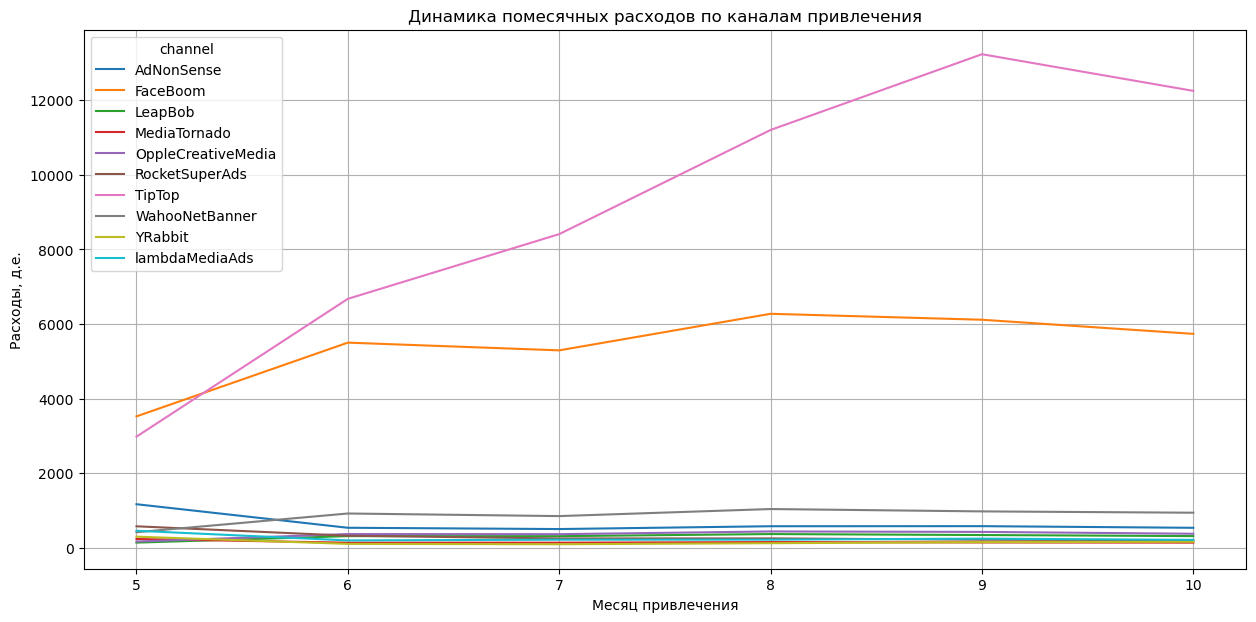

In [33]:
#Построим линейную диаграмму помесячных расходов на рекламу
costs_by_month.plot(grid=True,figsize=(15,7))
plt.ylabel('Расходы, д.е.')
plt.xlabel('Месяц привлечения')
plt.title('Динамика помесячных расходов по каналам привлечения');

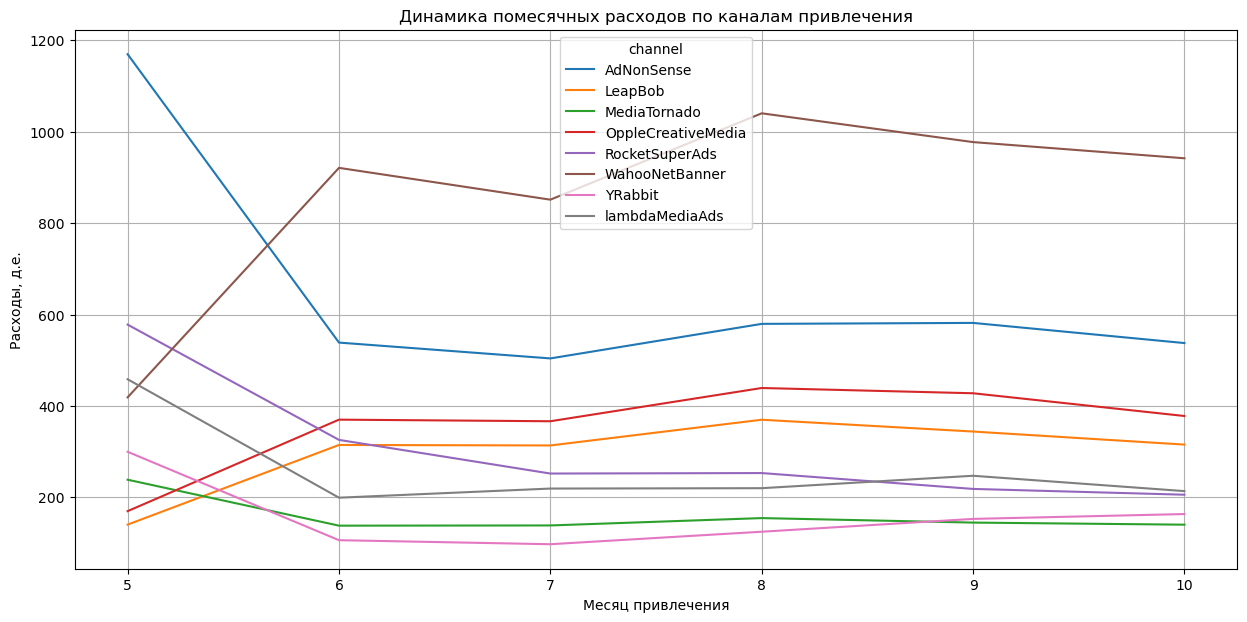

In [34]:
#посмотрим на динамику месячных расходов, исключив каналы  FaceBoom и TipTop
part_costs_by_month = (
    costs.query('channel!="FaceBoom" & channel!="TipTop"')
    .pivot_table(
        index='month',
        columns='channel',
        values='costs',
        aggfunc='sum'
    )
)
#Построим линейную диаграмму помесячных расходов на рекламу
part_costs_by_month.plot(grid=True,figsize=(15,7))
plt.ylabel('Расходы, д.е.')
plt.xlabel('Месяц привлечения')
plt.title('Динамика помесячных расходов по каналам привлечения');

В целом расходы по другим каналам были стабильны. В июне, по сравнению в маем, резко сократились расходы на канал AnNonSense(с 1200 д.е до 470 д.е.) и вырасли на канал WahooNetBanner(с 410 д.е. до 900 д.е.). 

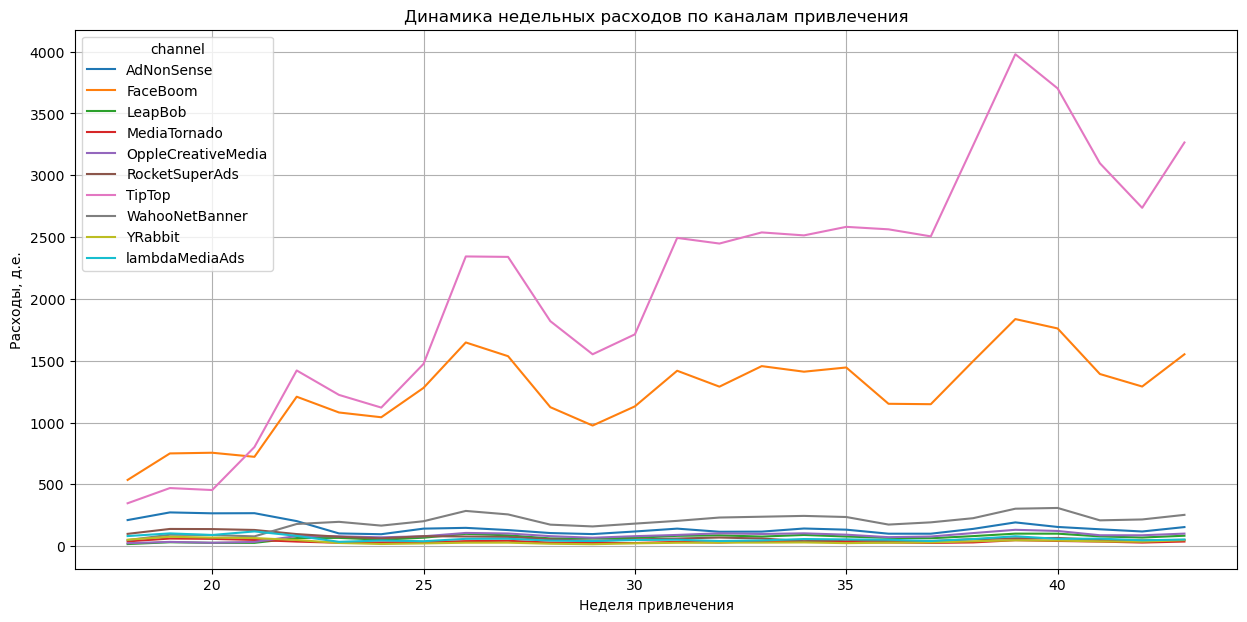

In [35]:
#Построим линейную диаграмму недельных расходов на рекламу
costs_by_week.plot(grid=True,figsize=(15,7))
plt.ylabel('Расходы, д.е.')
plt.xlabel('Неделя привлечения')
plt.title('Динамика недельных расходов по каналам привлечения');

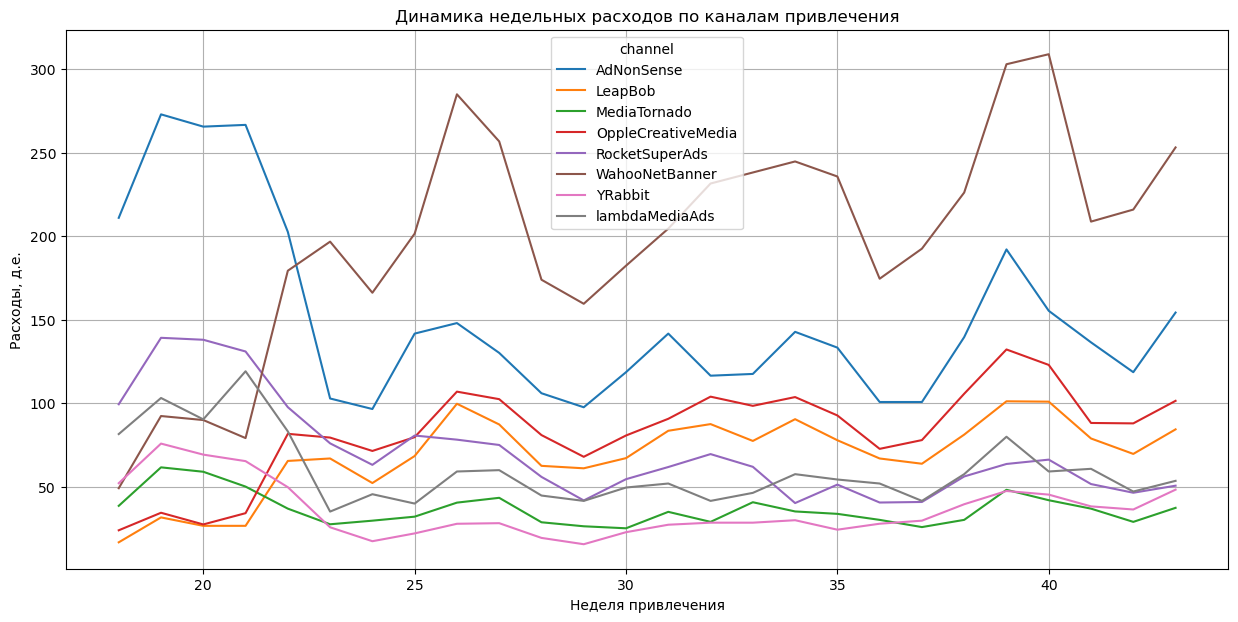

In [36]:
#посмотрим на динамику недельных расходов, исключив каналы  FaceBoom и TipTop
part_costs_by_week = (
    costs.query('channel!="FaceBoom" & channel!="TipTop"')
    .pivot_table(
        index='week',
        columns='channel',
        values='costs',
        aggfunc='sum'
    )
)
#Построим линейную диаграмму помесячных расходов на рекламу
part_costs_by_week.plot(grid=True,figsize=(15,7))
plt.ylabel('Расходы, д.е.')
plt.xlabel('Неделя привлечения')
plt.title('Динамика недельных расходов по каналам привлечения');

Общая сумма расходов на маркетинг за рассматриваемый период - 105495,3 д.е. 

Больше всего средств уходило на рекламу в TipTop - 54751.3 д.е. и FaceBoom - 32445.6 д.е.

Быстрее всего увеличивались расходы на TipTop, тогда как траты на остальные каналы продвижения были стабильны.

#### Средняя стоимость привлечения одного пльзователя (CAC)

In [37]:
# находим LTV с разбивкой по каналам привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

In [38]:
# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')

# считаем средний CAC по каналам привлечения

cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .sort_values('acquisition_cost', ascending=False)
    .rename(columns={'acquisition_cost': 'cac'})
)

cac

cac
channel                
TipTop             2.76
FaceBoom           1.11
AdNonSense         1.01
lambdaMediaAds     0.73
WahooNetBanner     0.60
RocketSuperAds     0.42
OppleCreativeMedia 0.25
MediaTornado       0.22
YRabbit            0.22
LeapBob            0.21
organic            0.00

Самые "дорогие" пользователи приходят из "TipTop" в среднем 2,76 д.е. за нового пользователя.

Пользователи привлеченные "FaceBoom" практически в 2,5 раза дешевле - 1,11 д.е. В то время как пользователи из "FaceBoom" чаще покупают приложение.

### Оценка окупаемости рекламы

#### Анализ общей окупаемости рекламы

In [39]:
#исключим органических пользователей из анализа окупаемости рекламы
profiles = profiles.query('channel!="organic"')

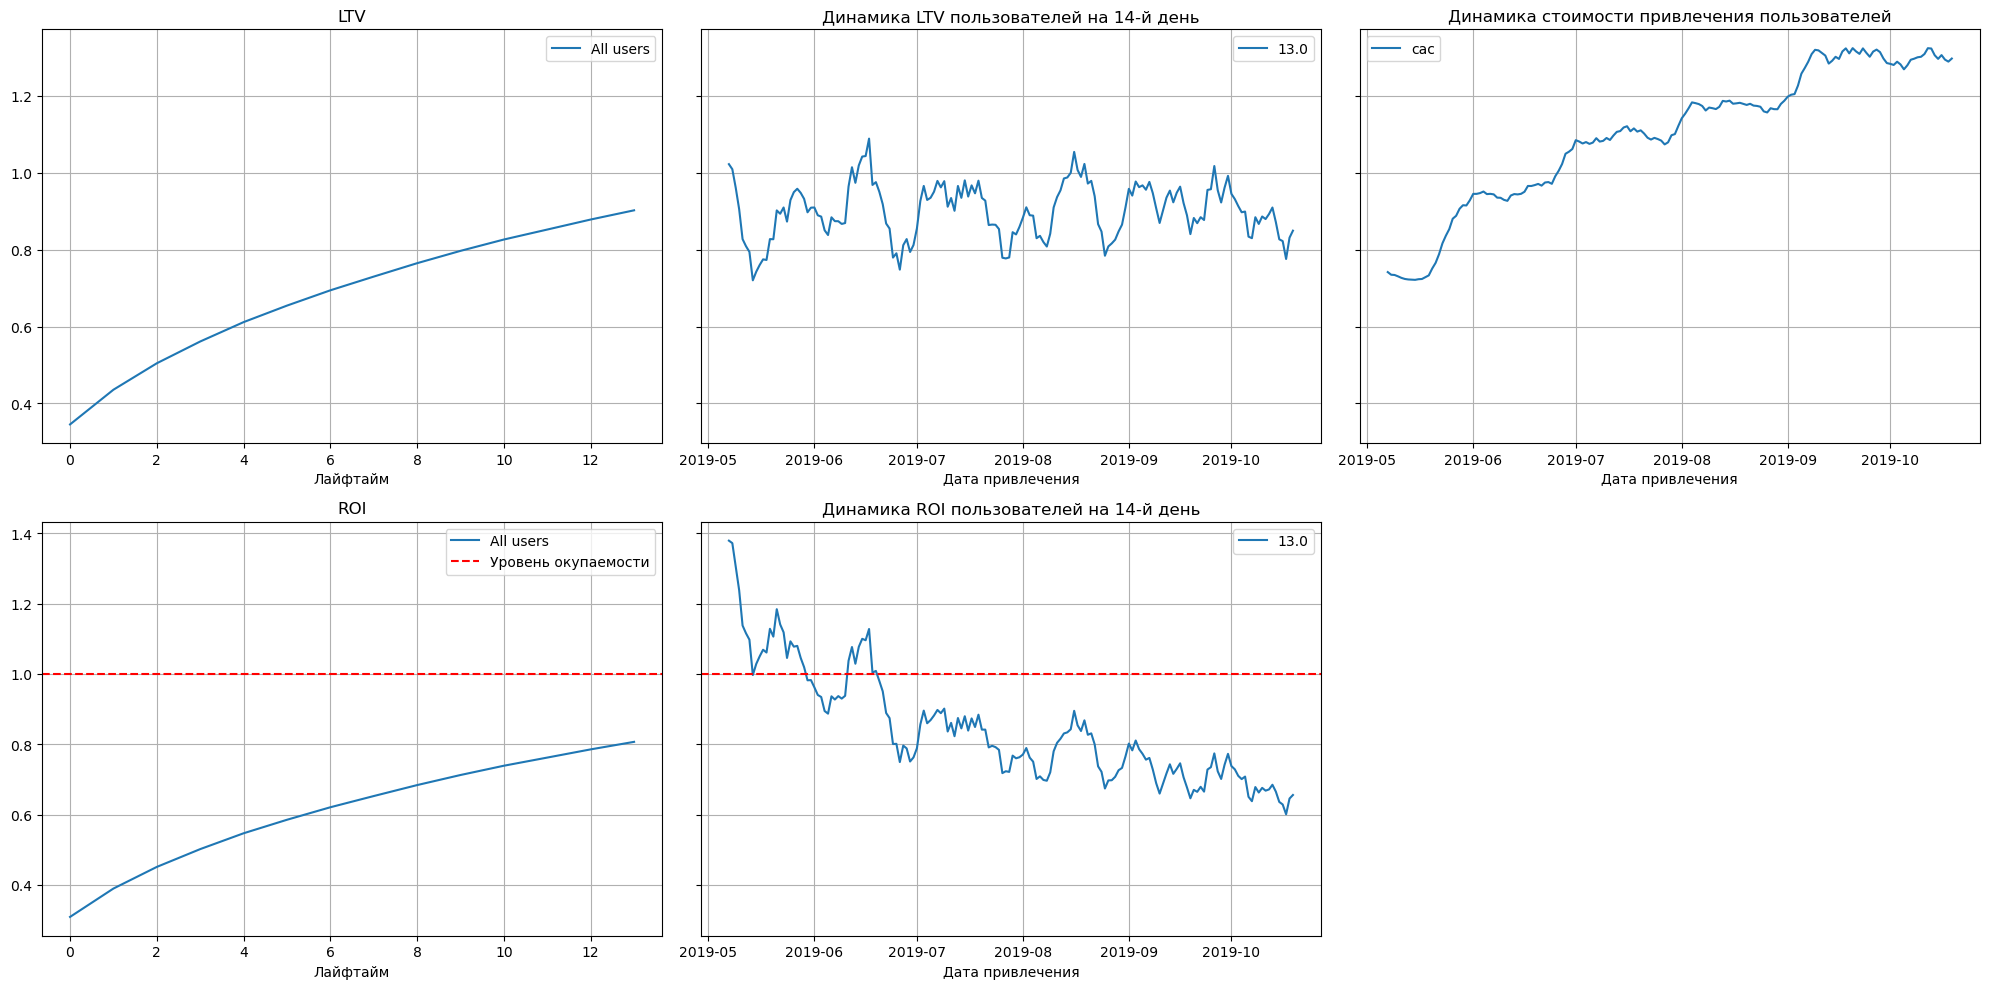

In [40]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Из графиков можно сделать следующие выводы:
- LTV подверженно сезонности;
- Стоимость привлечения пользователей растет;
- Инвестиции в рекламу не окупаются, ROI ниже 1;
- Убыточные рекламные компании начались с июня, что совпало с увеличением расходов на канал "TipTop";
- В целом реклама направленная на привлечение пользователей не окупается.

#### Анализ окупаемости рекламы с разбивкой по устройствам

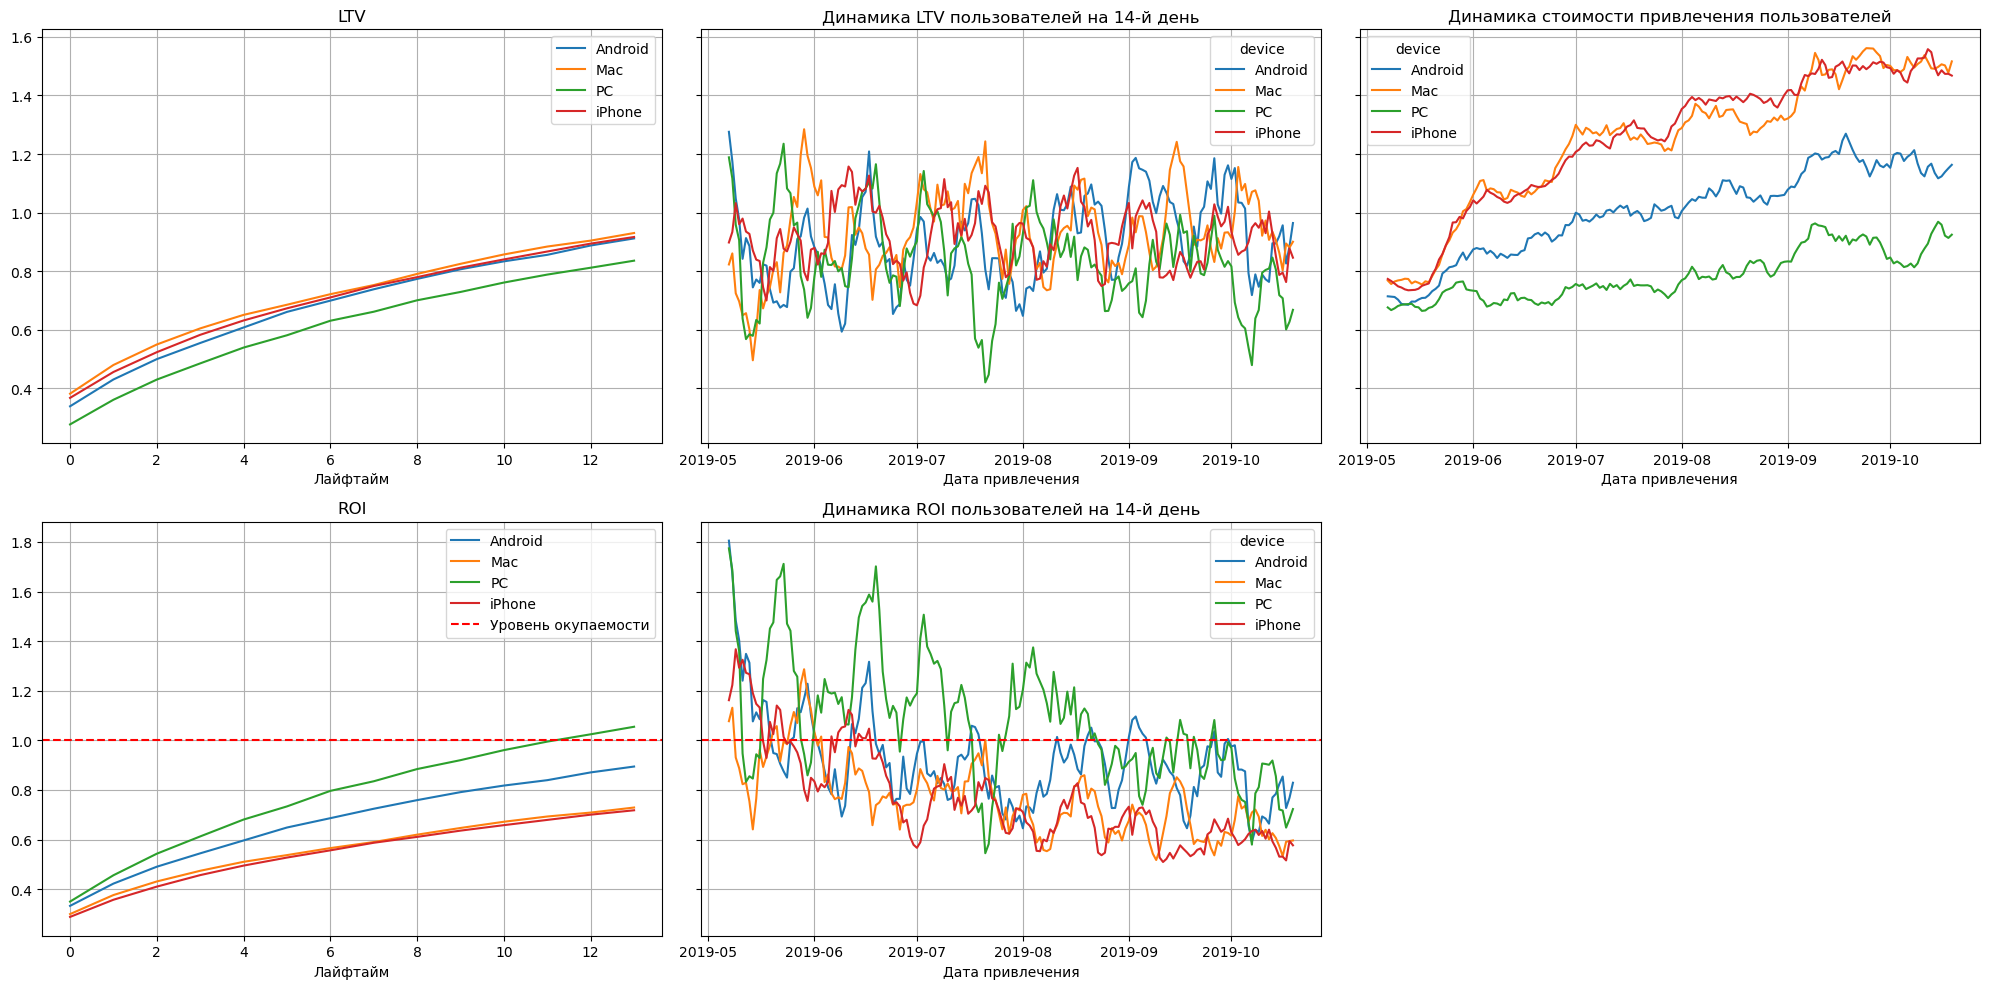

In [41]:
dimensions = ['device']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Из графиков можно сделать следующие выводы:
- Привлечение пользователей на IPhone и MAC обходится дороже всего, с июня расходы на эти девайсы увеличиваются, быстрее, чем на PC и Android.
- Инвестиции в рекламу окупаются только для  пользователей приходящих с PC;
- С мая заметно снижение динамики ROI для всех устройств;
- Показатели LTV, CAC, ROI для IPhone и MAC изменяются подозрительно одинаково;
- Возможно существуют проблемы в работе приложения или трудности оплаты для Android и iOS.

#### Анализ окупаемости рекламы с разбивкой по странам

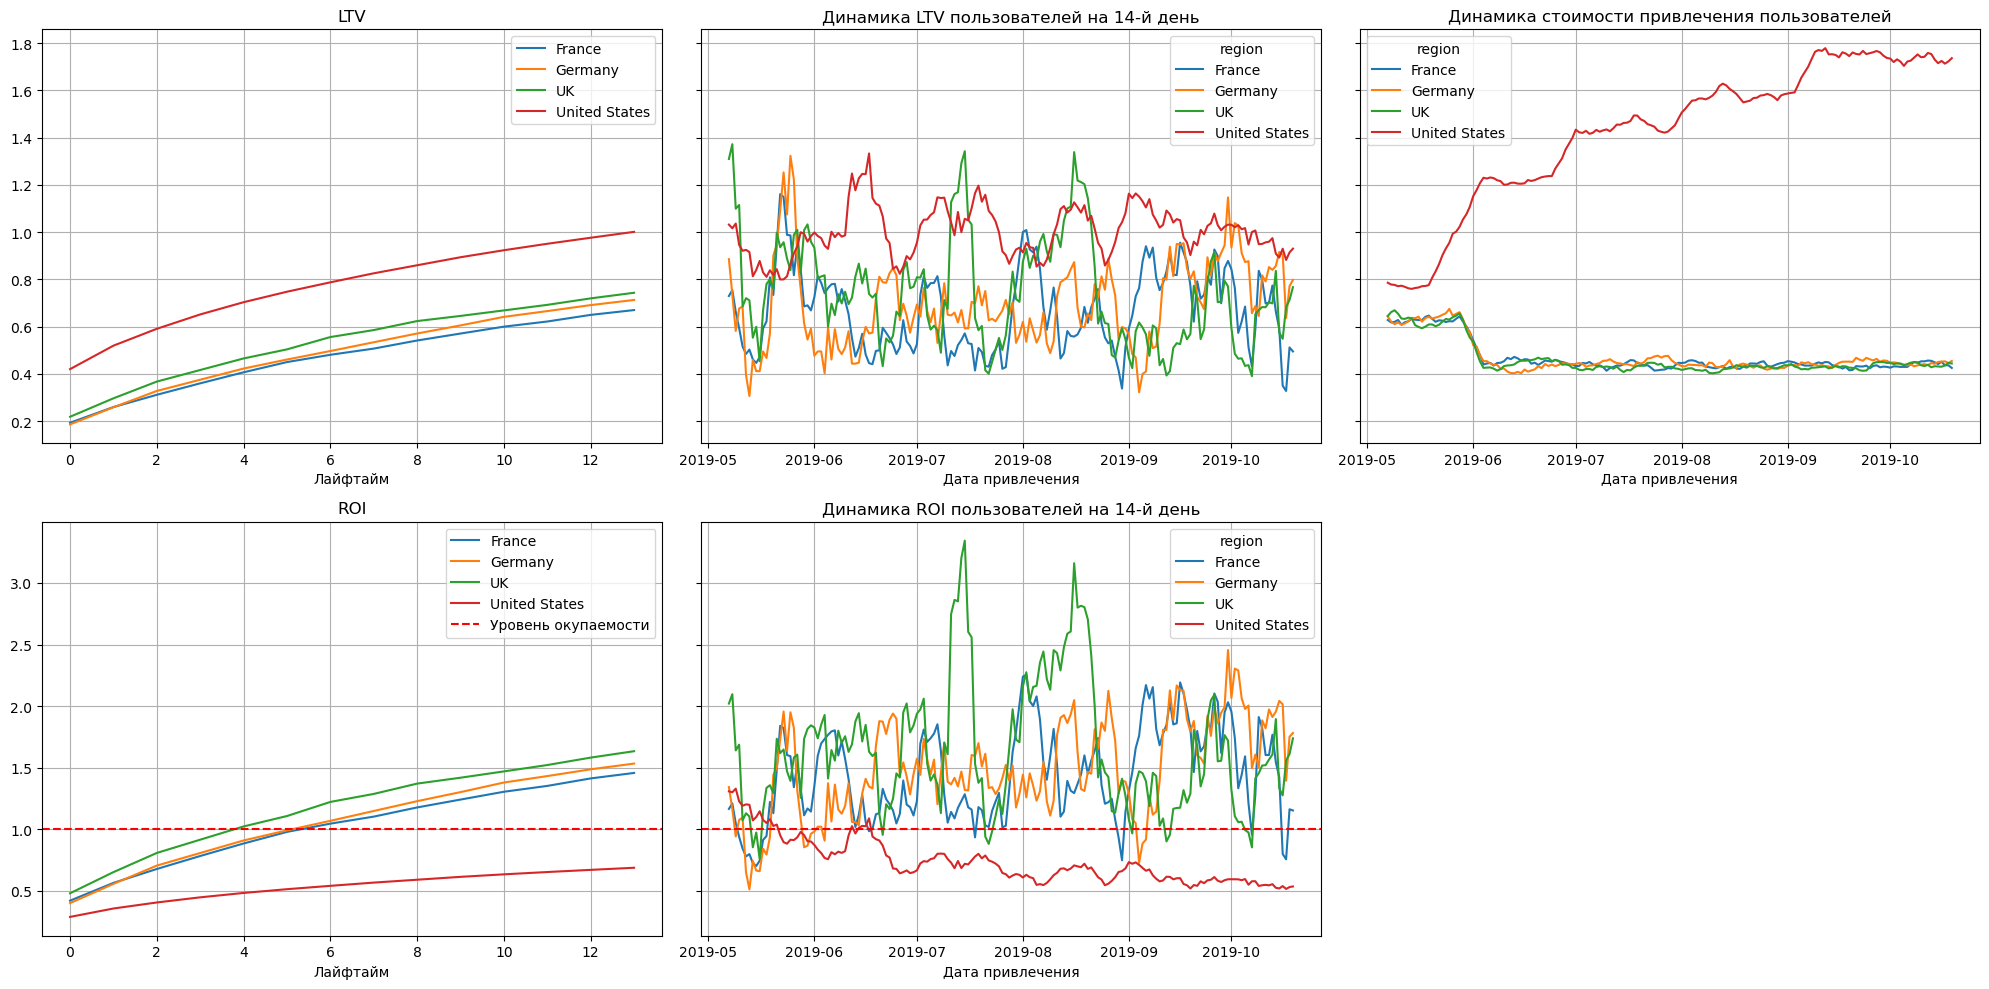

In [42]:
dimensions = ['region']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Из графиков можно сделать следующие выводы:
- c июня стоимость привлечения пользователей из США начала резко увеличиваться, в то время как расходы на привлечение в других странах сократились;
- инвестиции в рекламу не окупились только в США;
- в середине июля и середине августа в Великобритании прошли давольно успешные рекламны компании, которые привлекли качественных пользователей;
- Динамика окупаемости рекламы в США снижалась. 

#### Анализ окупаемости рекламы с разбивкой по каналам привлечения

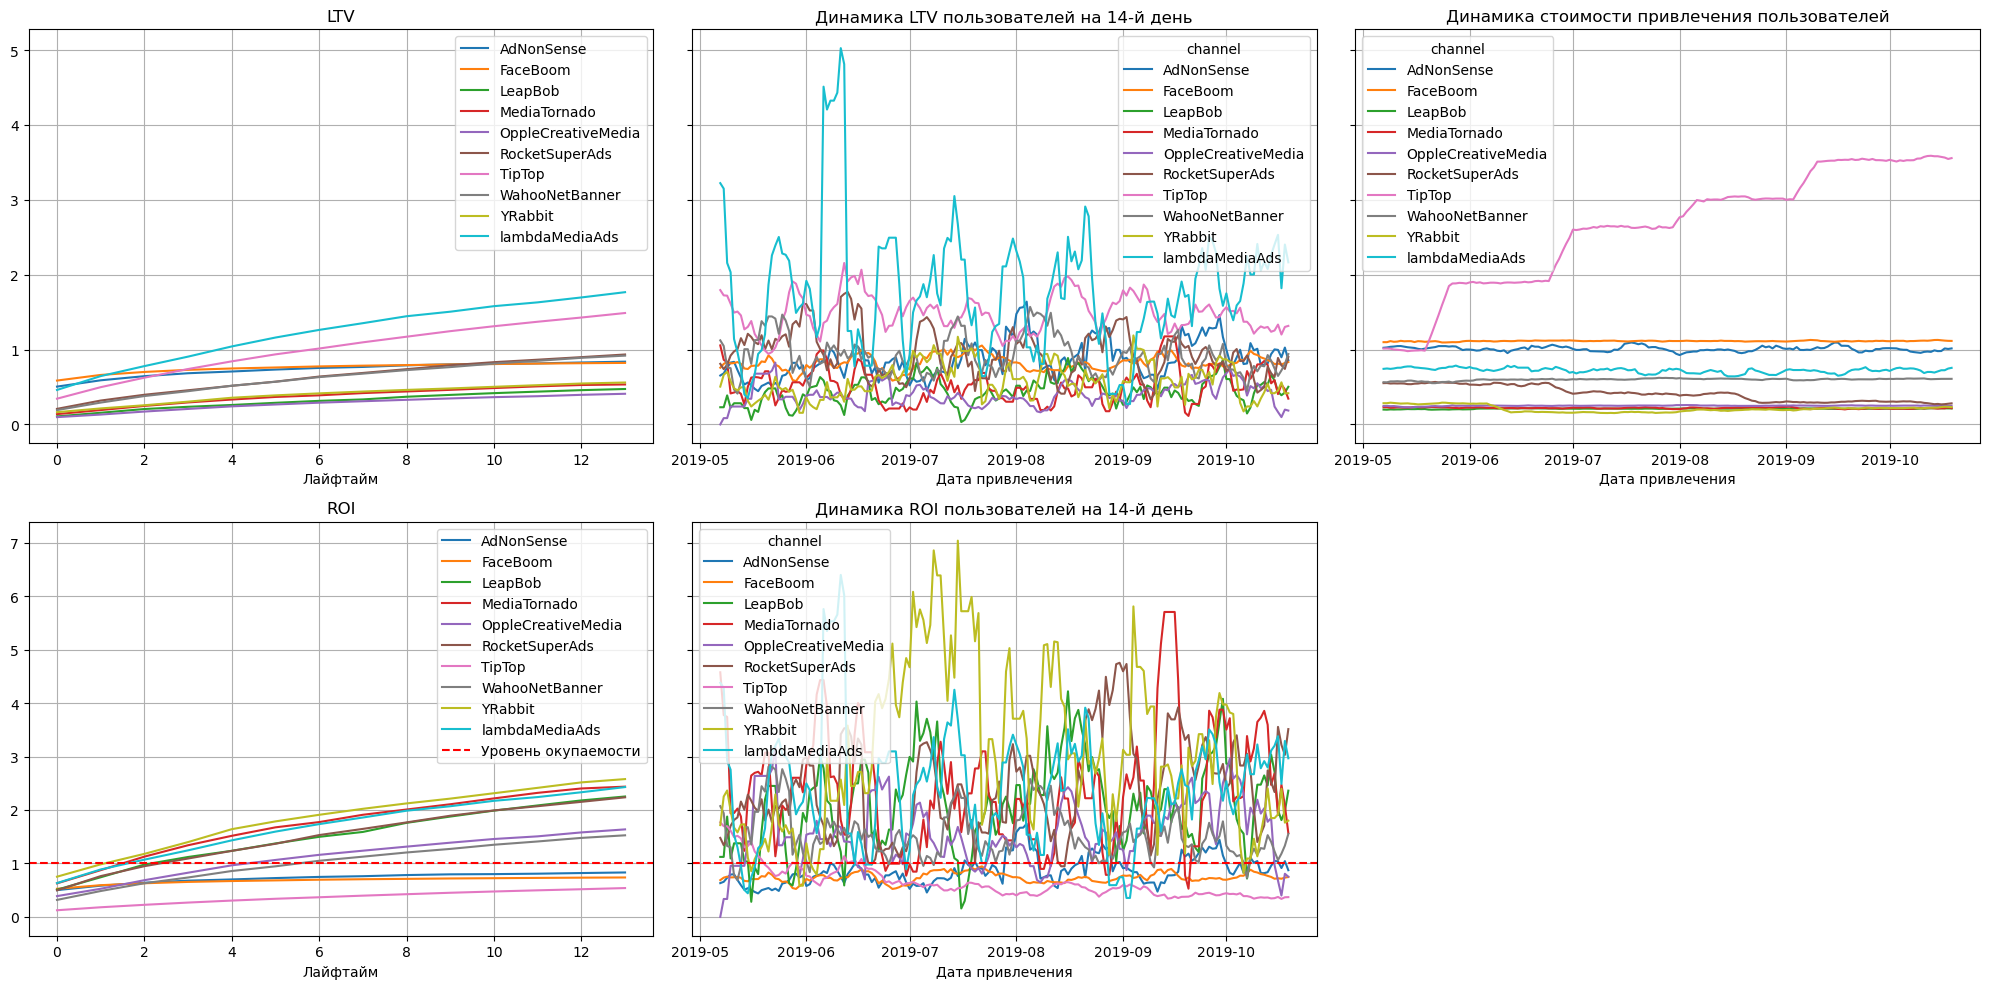

In [43]:
dimensions = ['channel']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Из графиков можно сделать следующие выводы:
- инвестиции в рекламу не окупаются только на каналах TipTop, FaceBoom, AdNonSense;
- качество привлекаемых клиентов стабильно;
- стоимость привлечения пользователей из канала TipTop увеличивалась на протяжении всего периода, в то время как для остальных каналов САС оставался стабильным.

Назревает предположение, что существуют проблемы с привлечением пользователей из США на устройствах IPhone и MAC по каналу TipTop. Проверим это в дальнейшем исследовании.

Узнаем в чем причина, в низкой конверсии или в низком удержании. Посчитаем и визуализируем конверсию, вызвав функции `get_conversion()` и `plot_conversion()`.

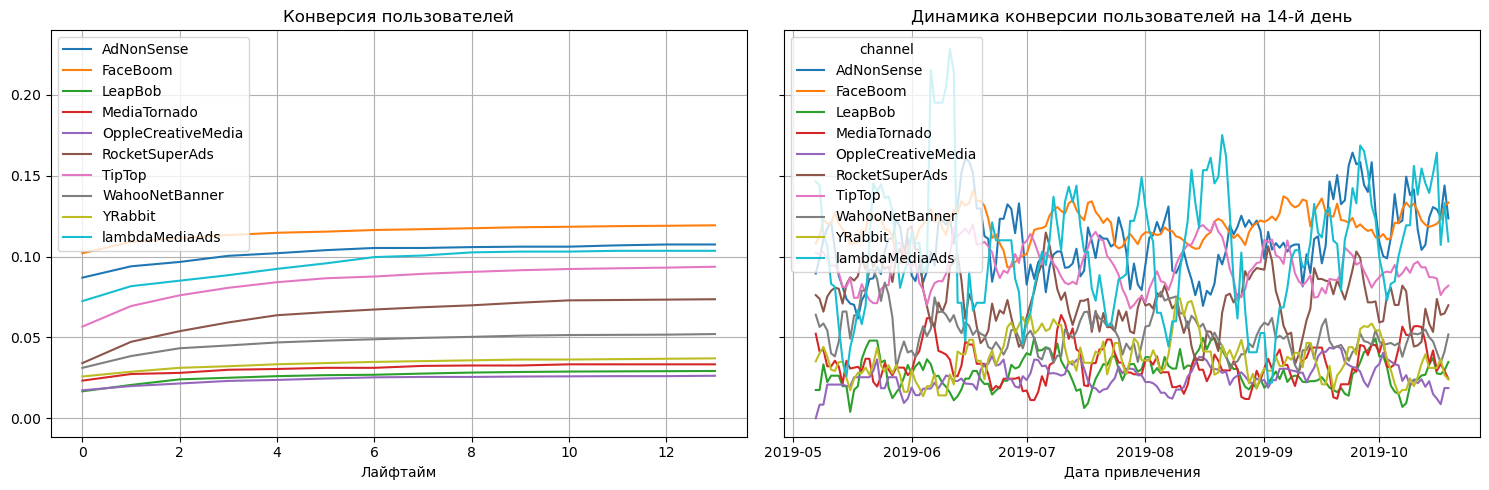

In [44]:
dimensions=['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия достаточно низкая для всех каналов, наибольшую конверсию приносит FaceBoom.

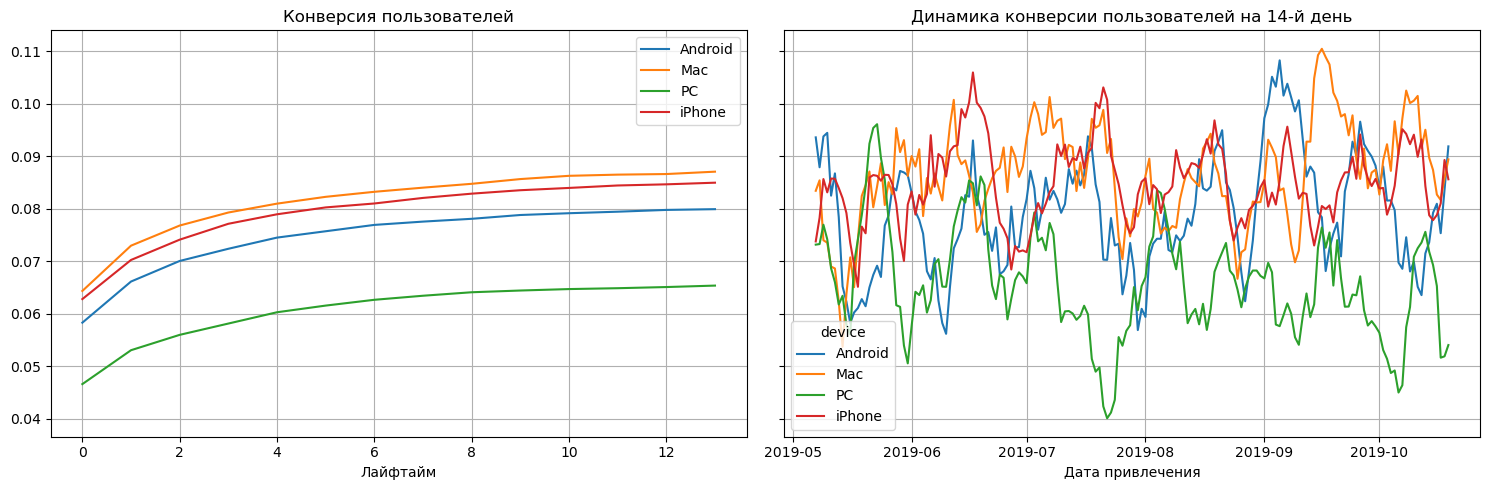

In [45]:
dimensions=['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Наименьшая конверсия у пользователей PC, конверсия у остальных девайсов схожа. Необходимо обратить внимание почему этот канал проседает, возможно это наша точка роста.

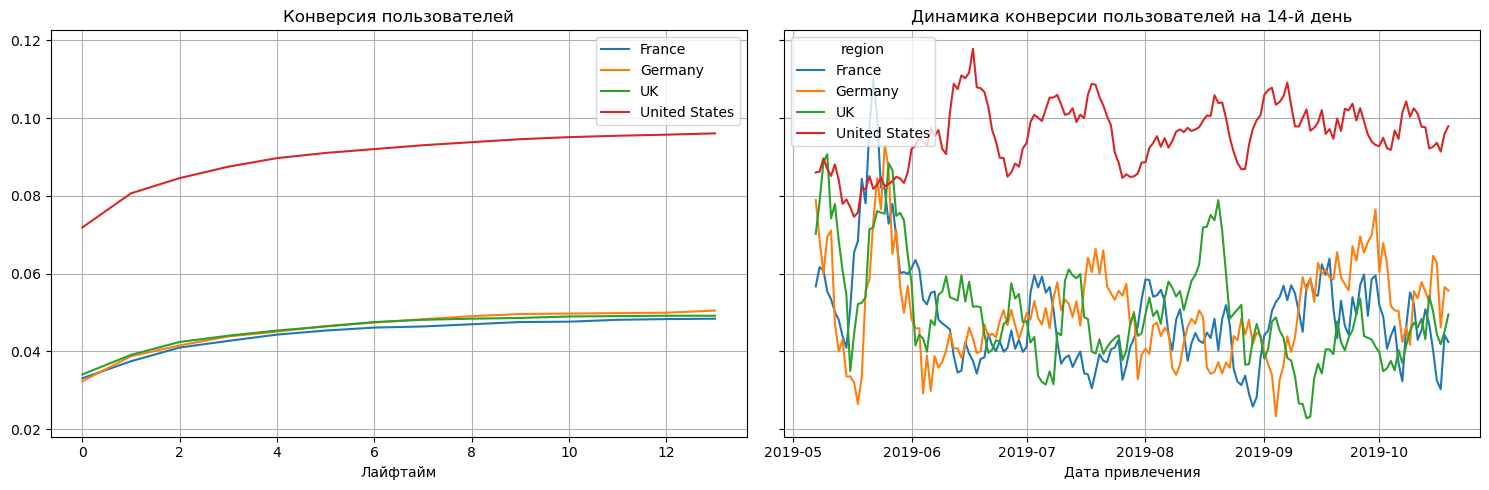

In [46]:
dimensions=['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Наибольшая конверсия у пользователей из США, остальные страны имеют почти одинаковую коверсию.

#### Анализ удержания с разбивкой по регионам

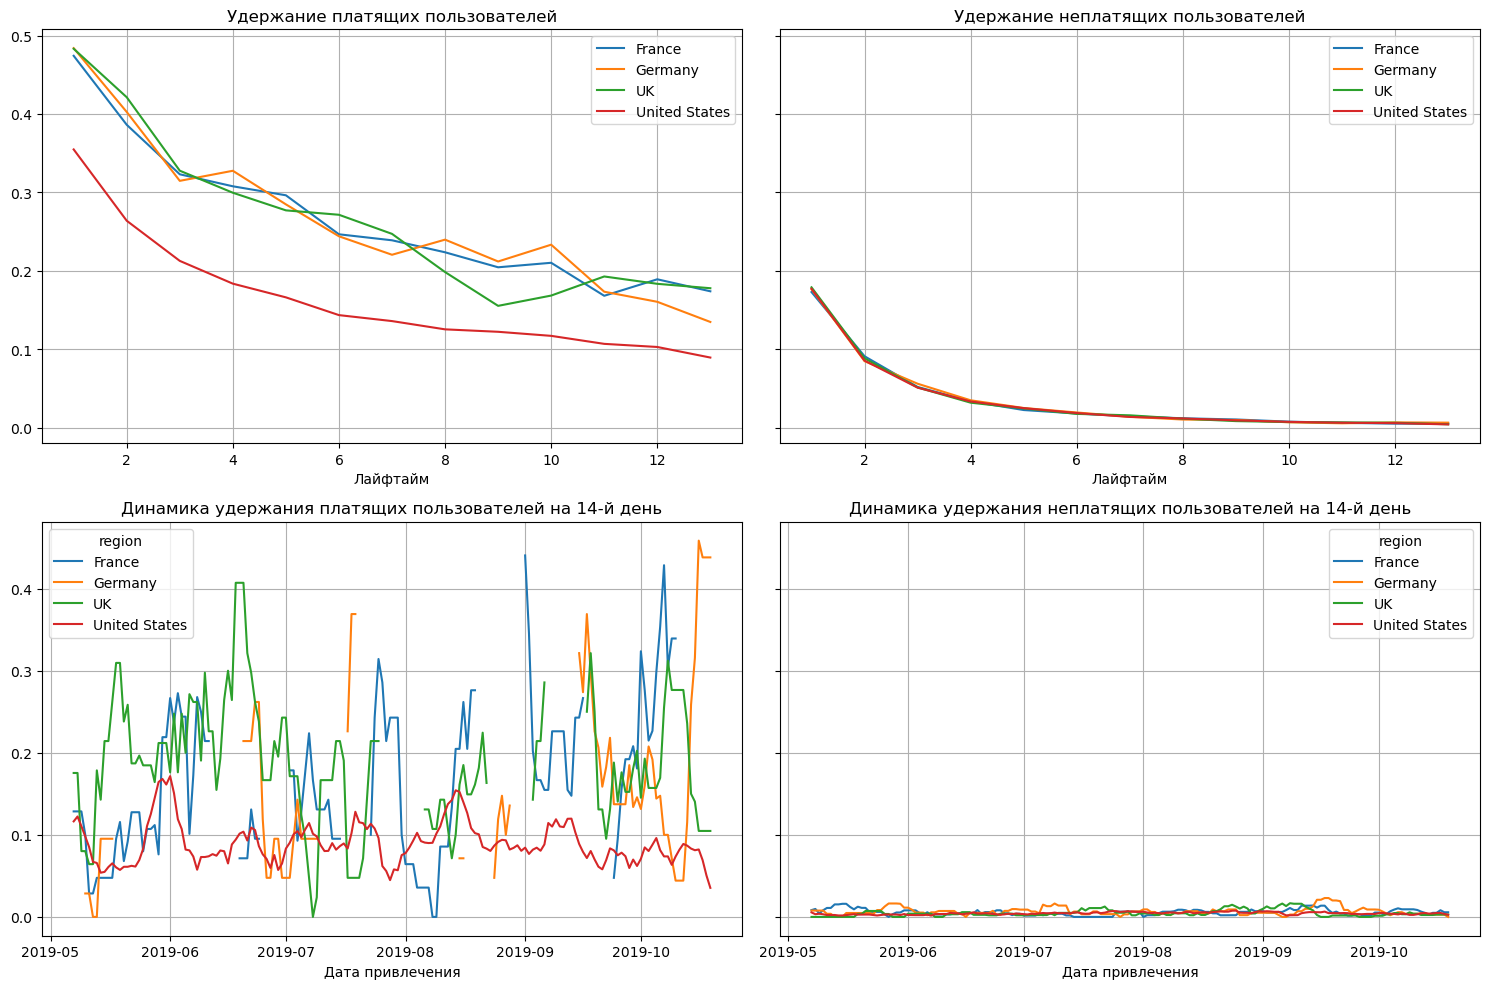

In [47]:
dimensions=['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Несмотря на то, что наилучшая конверсия у пользователей из США, удержание платящих пользователей в США хуже чем во всех остальных странах.

#### Анализ удержания с разбивкой по каналам

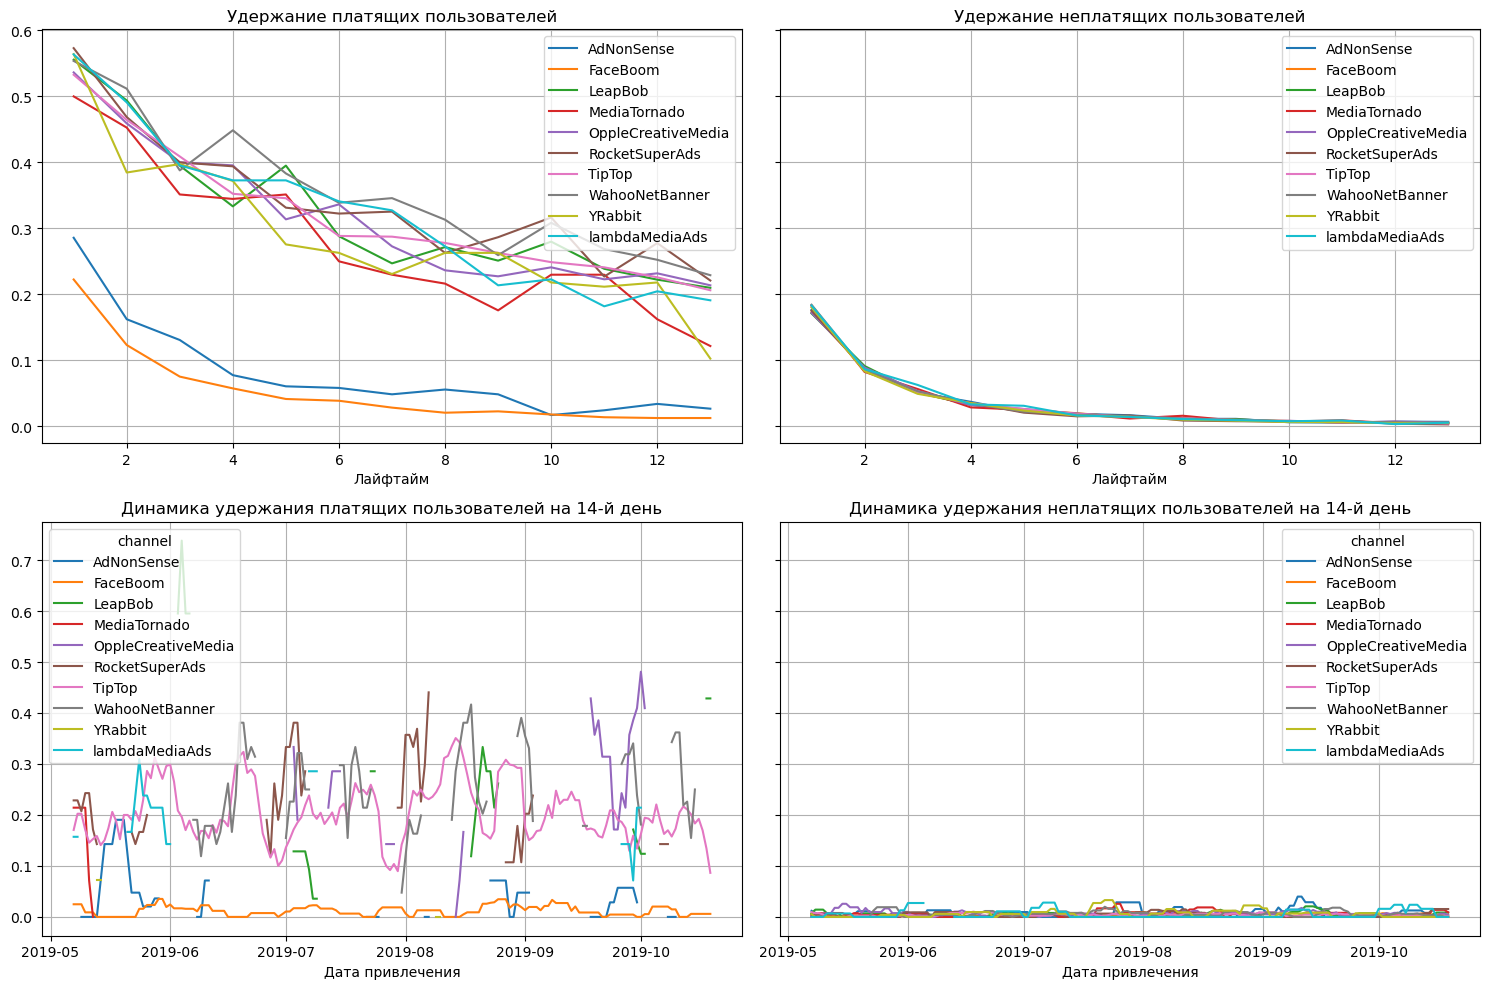

In [48]:
dimensions=['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Клиенты, привлеченные на каналах AdNonSence и FaceBoom хуже всего удерживаются. Возможно эти каналы привлекают не нашу целевую аудиторию. Для остальных каналов удержание примерно одинаково.

#### Анализ удержания с разбивкой по устройствам

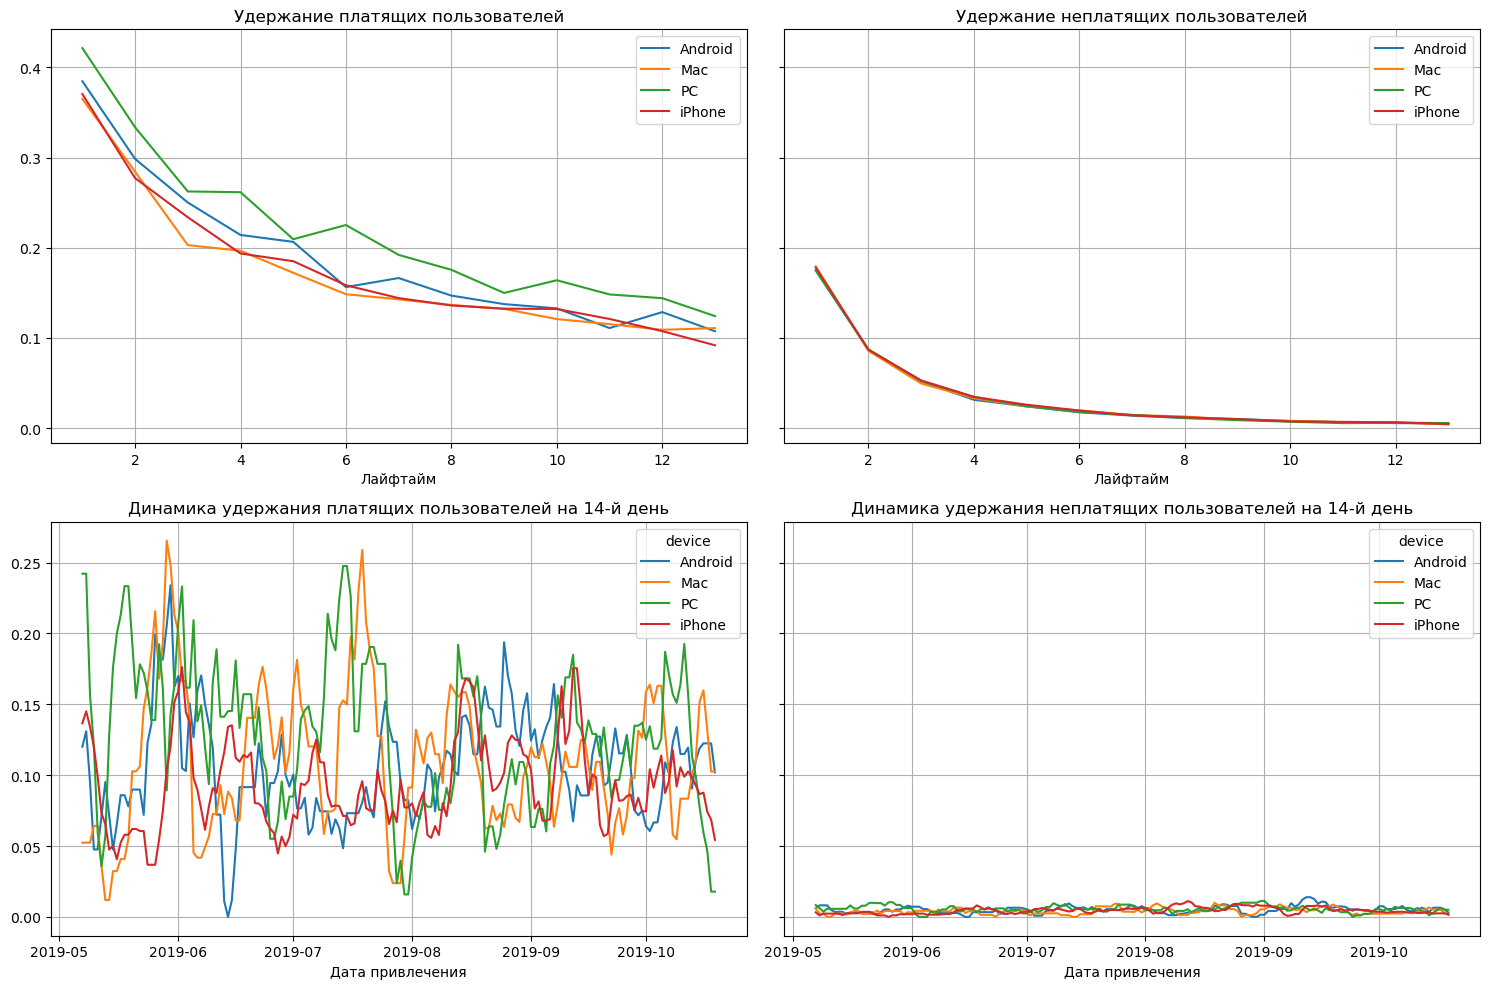

In [49]:
dimensions=['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Все устройства показывают примерно одинаковые значения удержания пользователей, как платящих. так и неплатящих.

#### Анализ окупаемости по каналам и девайсам в США

Попытаемся найти причину низких показателей ROI в США.

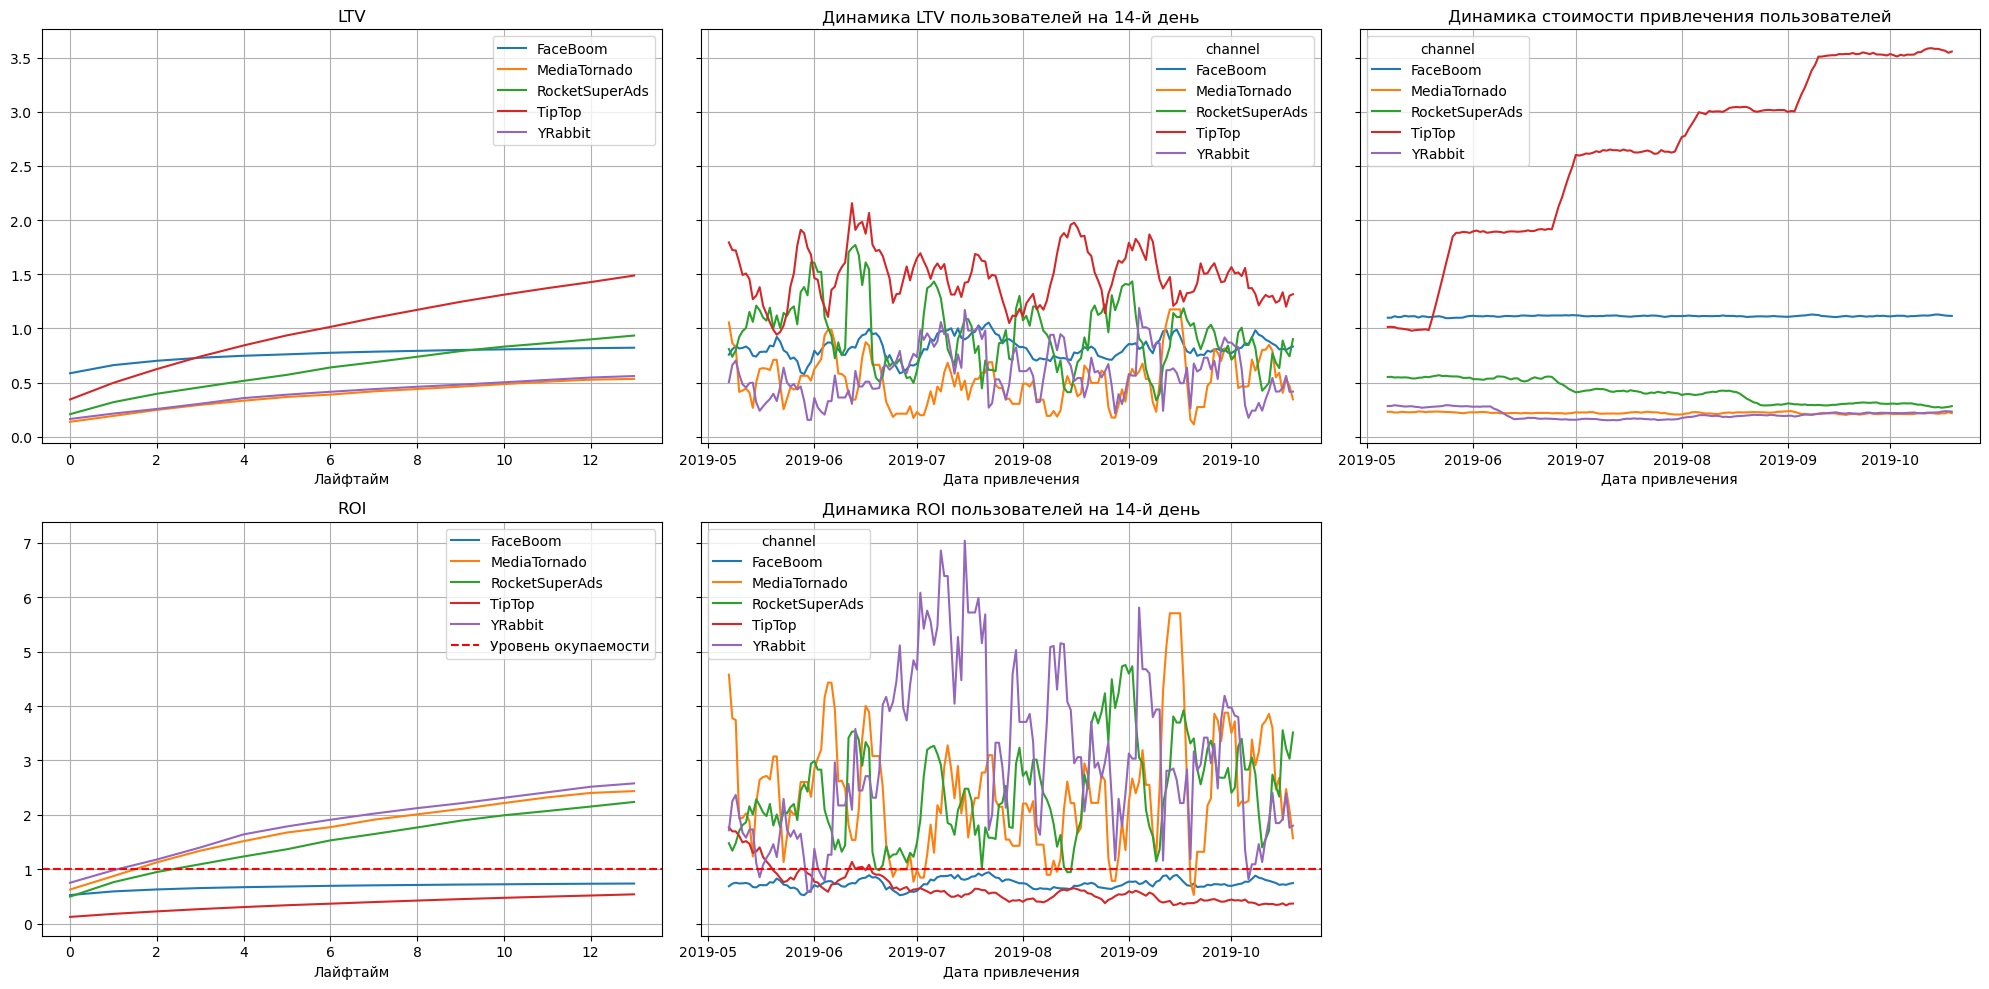

In [50]:
# анализ окупаемости по каналам привлечения
usa_profiles= profiles.query('region=="United States"')
dimensions = ['channel']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    usa_profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

В США не окупаются каналы привлечения FaceBoom и TipTop, при этом стоимость привлечения на канале TipTop за период увеличилась в 2,5 раза. 

Помимо этого мы видим хорошую окупаемость и динамику окупаемости у каналов: YRabbit, MediaTornado и RocketSuperAds - больше чем в два раза.

Считаю, что следует обратить внимание на особенности маркетинговой компании, которая проводилась с конца июня до середины июля на канале YRabbit, чтобы посмотреть с чем связан многократный рост ROI. Вполне возможно, что это недооцененный канал и стоит обратить на него больше внимания.  

Полагаю, что необходимо протестировать, как отразится на общей выручке перераспределение средств на рекламу в США с неокупаемых каналов на окупаемые.

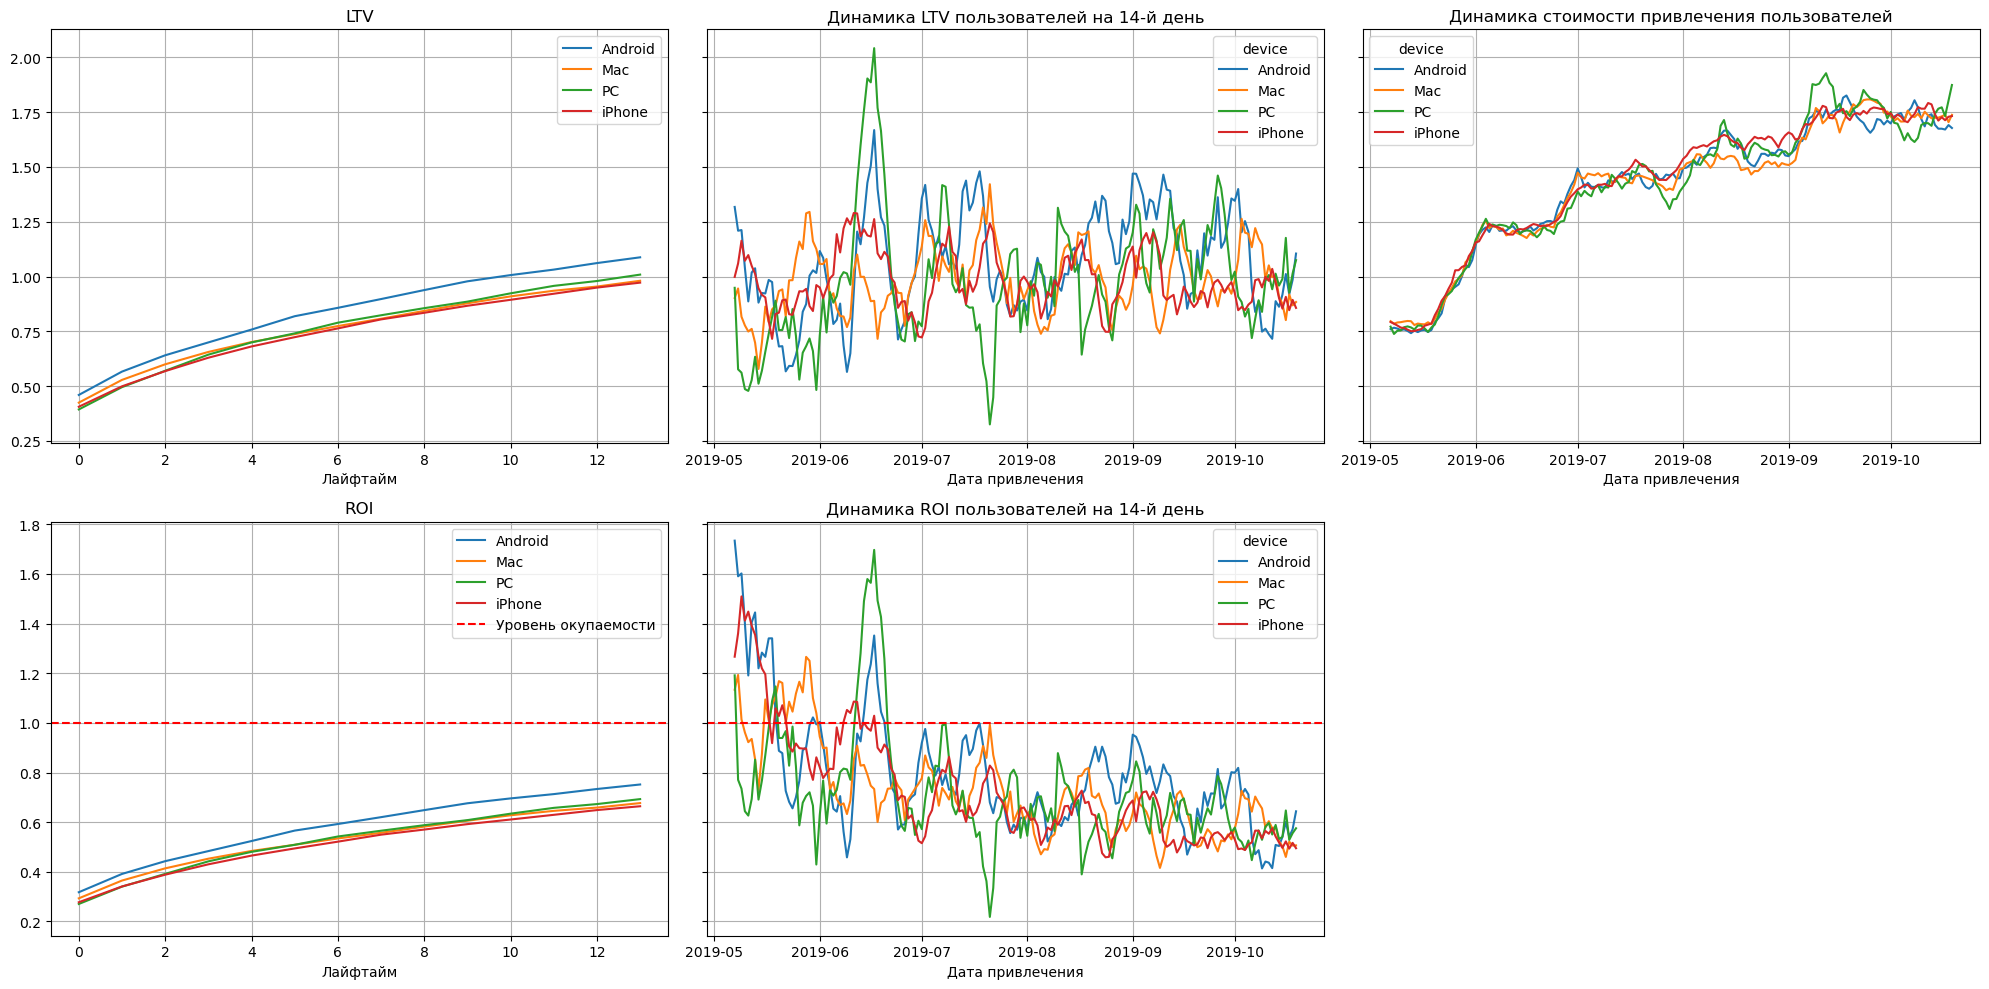

In [51]:
# анализ окупаемости по девайсам пользователей
dimensions = ['device']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    usa_profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Если смотреть в разрезе девайсов, с которых пользователи заходят в приложение, то реклама на всех устройстах в США не окупается.  

Посмотрим, а окупаются ли инвестиции по устройствам в других странах, без США.

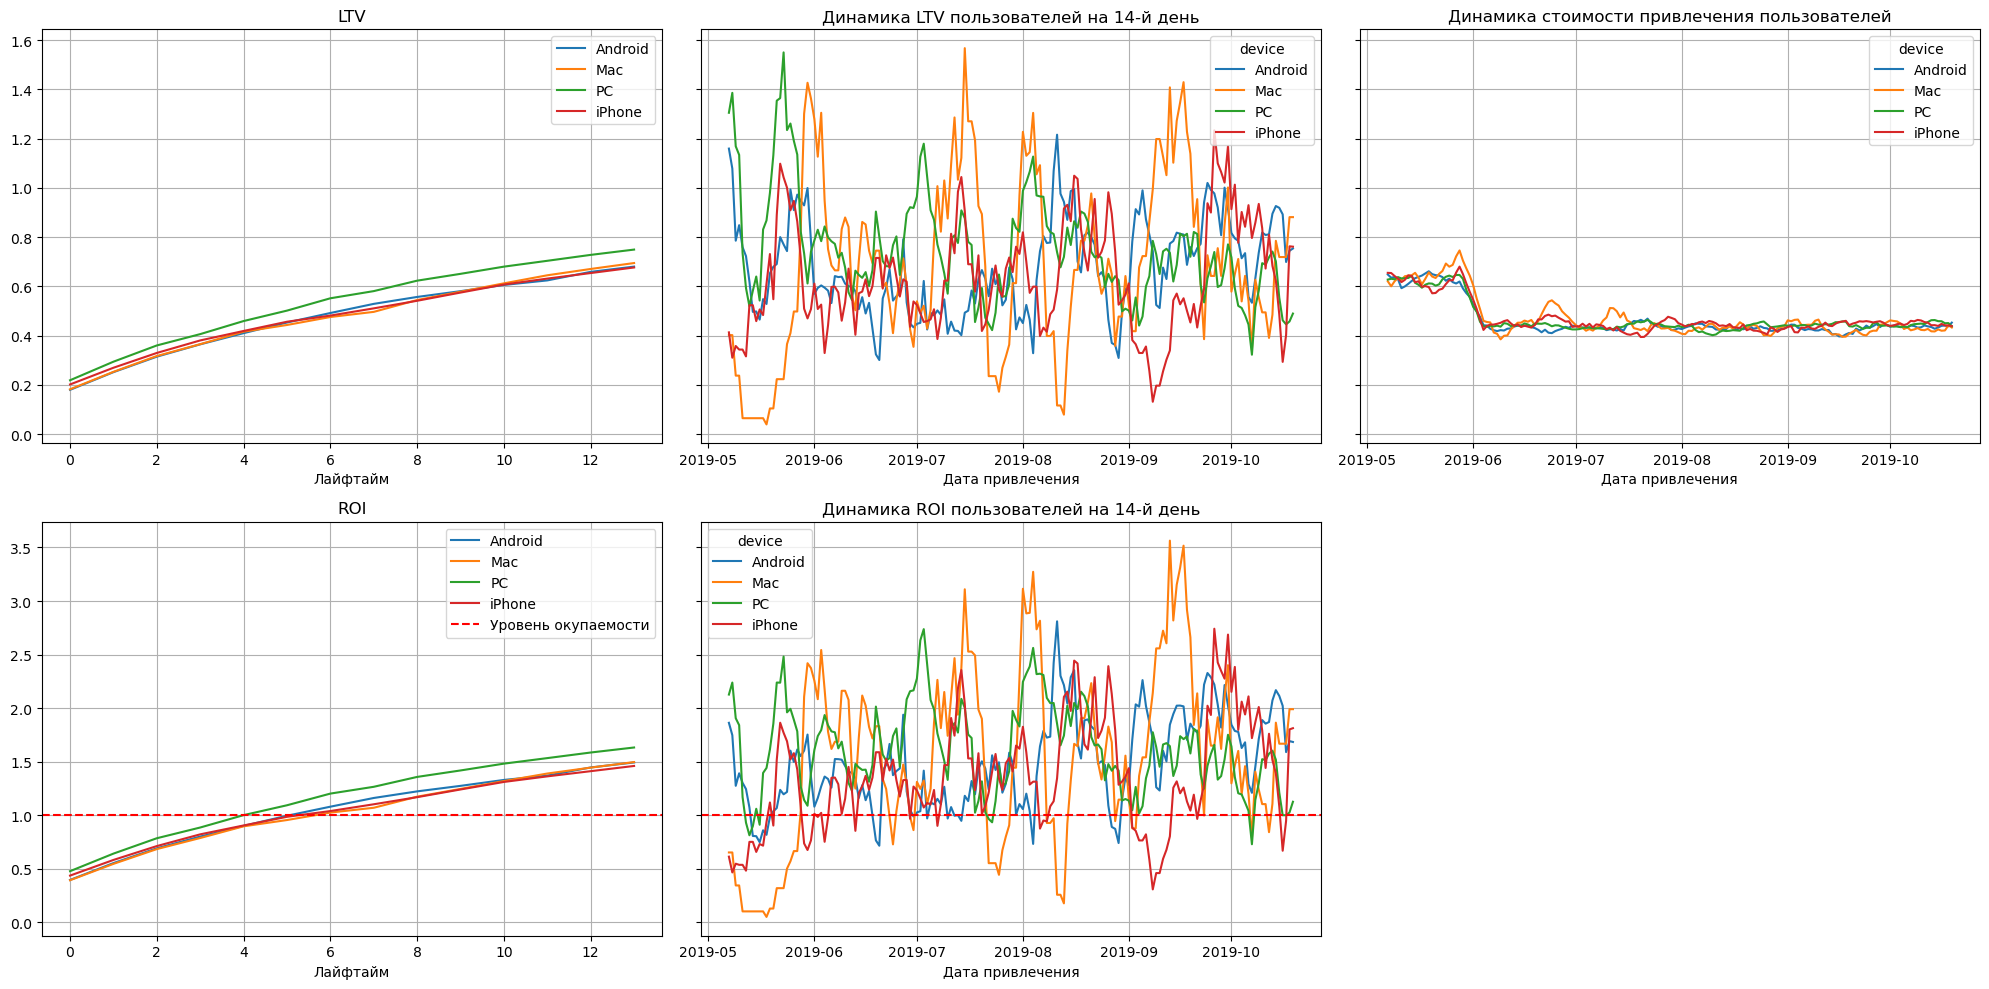

In [52]:
profiles_other_country = profiles.query('region!="United States"')
dimensions = ['device']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_other_country, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

В других странах пользователи всех устройств окупаются.

#### Анализ удержания и конверсии по каналам и девайсам в США

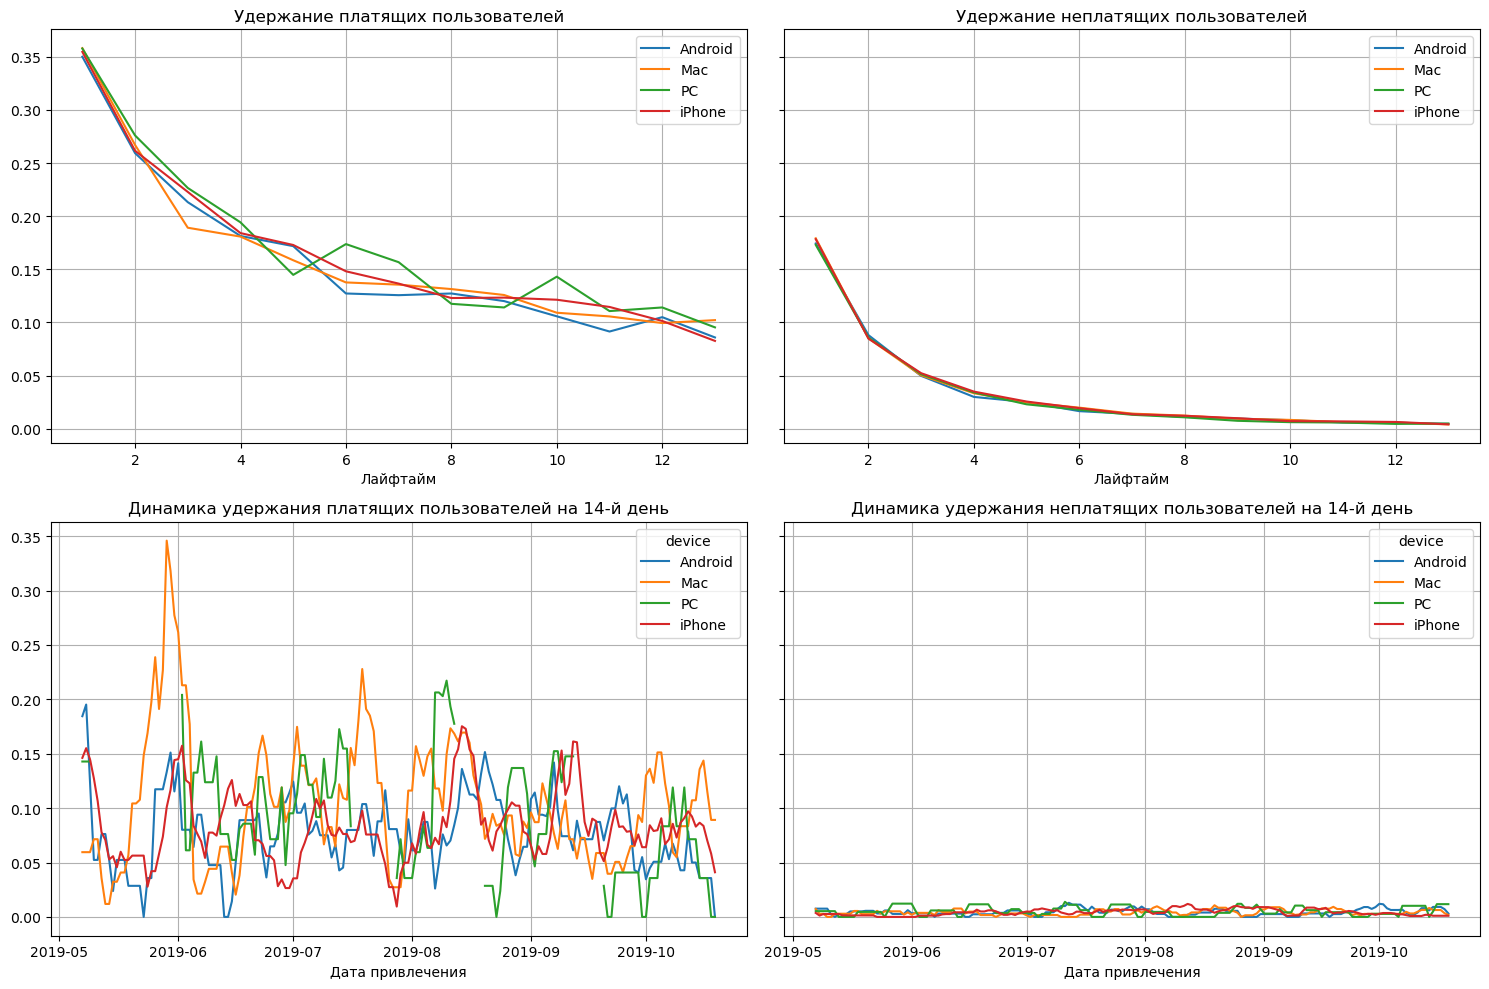

In [53]:
# анализ удержания по устройствам
dimensions=['device']
retention_raw, retention_grouped, retention_history = get_retention(
    usa_profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей на всех девайсах в США примерно одинаковое.

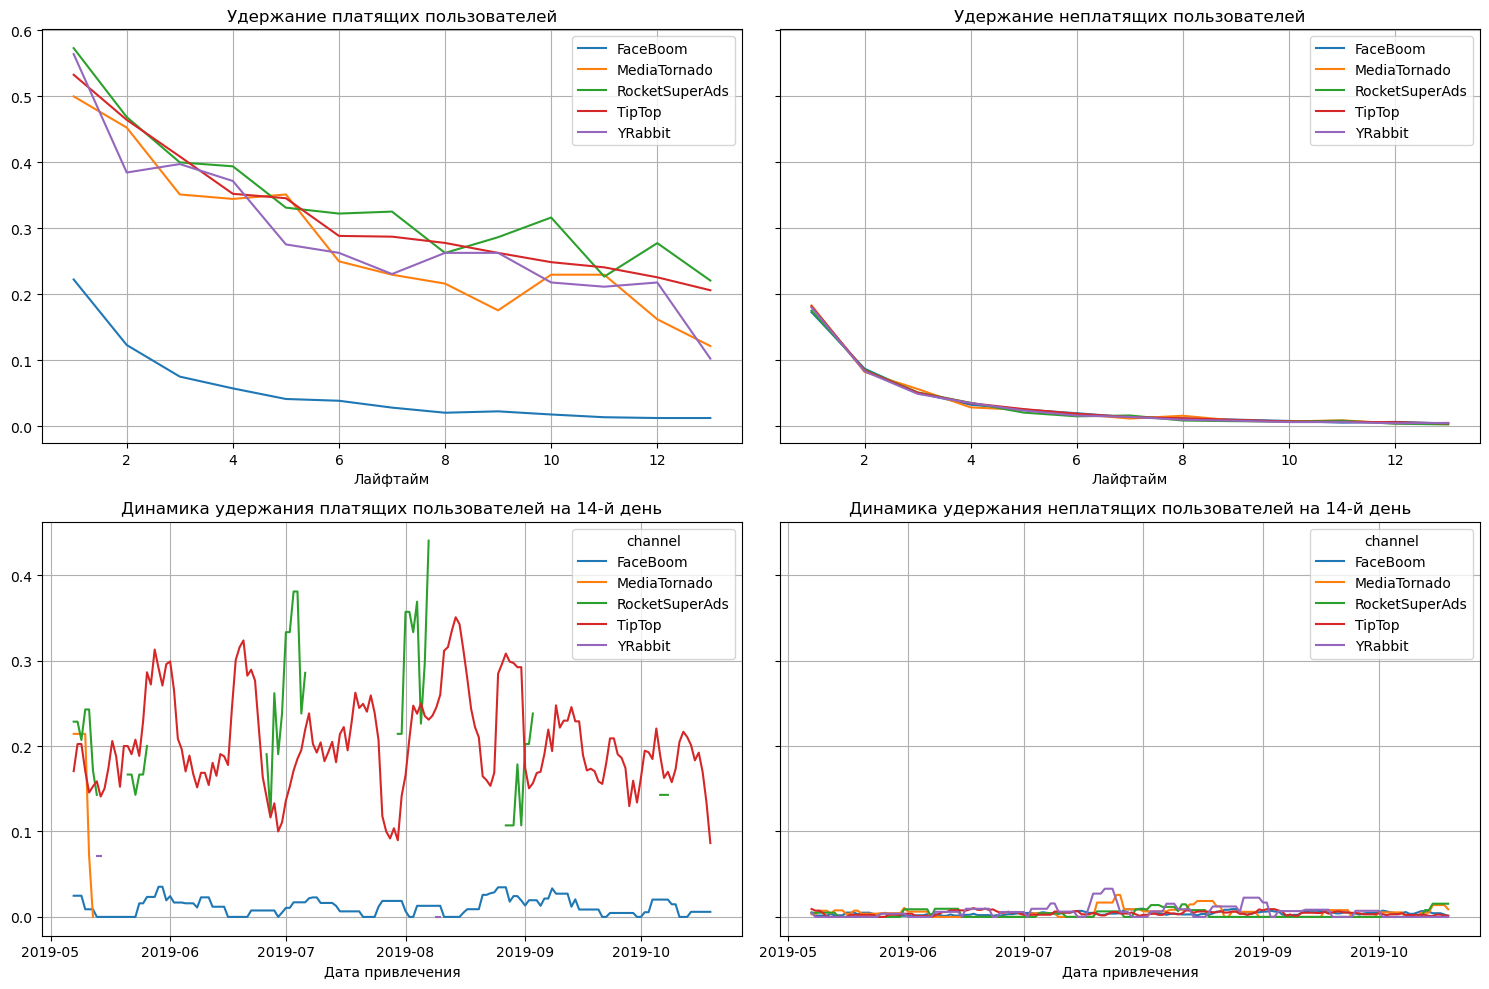

In [54]:
# анализ удержания по каналам
dimensions=['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    usa_profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

In [55]:
retention_grouped

cohort_size    0    1    2    3    4    5    6    7  \
payer channel                                                               
False FaceBoom              24182 1.00 0.17 0.09 0.05 0.03 0.03 0.02 0.01   
      MediaTornado           4019 1.00 0.18 0.08 0.06 0.03 0.02 0.02 0.01   
      RocketSuperAds         3916 1.00 0.18 0.09 0.05 0.04 0.02 0.02 0.02   
      TipTop                16713 1.00 0.18 0.08 0.05 0.03 0.03 0.02 0.01   
      YRabbit                3946 1.00 0.18 0.08 0.05 0.04 0.02 0.02 0.01   
True  FaceBoom               3362 1.00 0.22 0.12 0.08 0.06 0.04 0.04 0.03   
      MediaTornado            148 1.00 0.50 0.45 0.35 0.34 0.35 0.25 0.23   
      RocketSuperAds          335 1.00 0.57 0.47 0.40 0.39 0.33 0.32 0.33   
      TipTop                 1785 1.00 0.53 0.46 0.41 0.35 0.35 0.29 0.29   
      YRabbit                 156 1.00 0.56 0.38 0.40 0.37 0.28 0.26 0.23   

                        8    9   10   11   12   13  
payer channel                                       
False FaceBoom       0.01 0.01 0.01 0.01 0.01 0.00  
      MediaTornado   0.02 0.01 0.01 0.01 0.00 0.00  
      RocketSuperAds 0.01 0.01 0.01 0.01 0.00 0.00  
      TipTop         0.01 0.01 0.01 0.01 0.01 0.00  
      YRabbit        0.01 0.01 0.01 0.01 0.00 0.01  
True  FaceBoom       0.02 0.02 0.02 0.01 0.01 0.01  
      MediaTornado   0.22 0.18 0.23 0.23 0.16 0.12  
      RocketSuperAds 0.26 0.29 0.32 0.23 0.28 0.22  
      TipTop         0.28 0.26 0.25 0.24 0.23 0.21  
      YRabbit        0.26 0.26 0.22 0.21 0.22 0.10

Хуже всего в США удержание платящих пользователей, привлеченных из FaceBoom, к 14-му дню в "живых" остается только 1% пользователей. Возможно, этот канал привлекает не нашу целевую аудиторию. Остальные источники показывают лучшие результаты удержания, до 14-го дня доживает от 10% до 20% платящих пользователей.

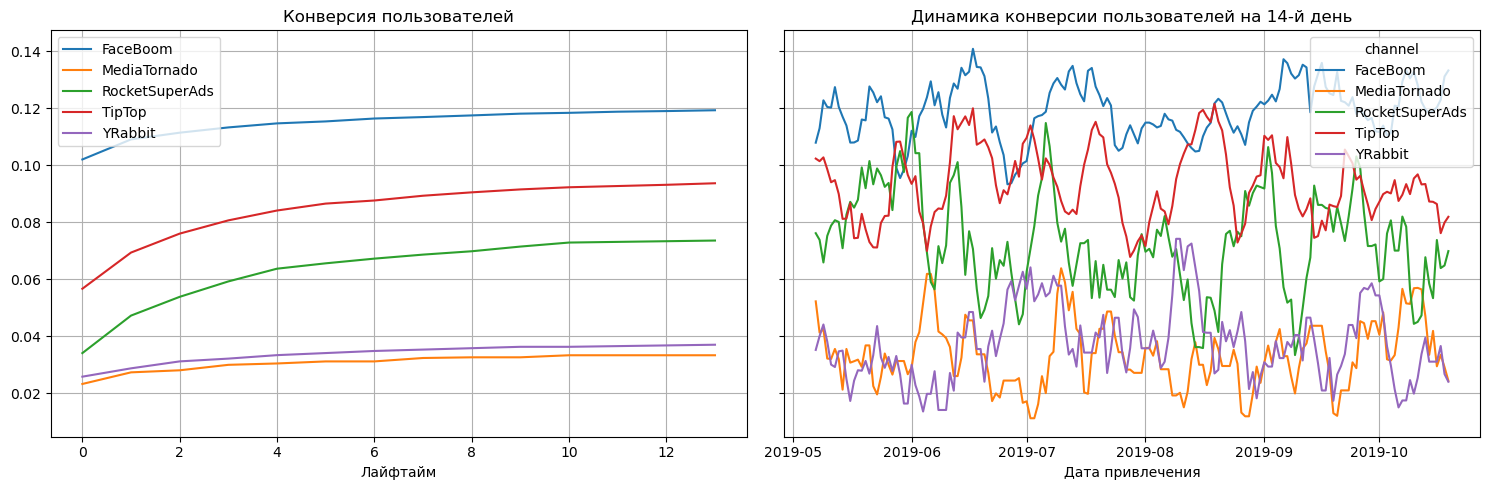

In [56]:
# анализ конверсии по каналам
dimensions=['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    usa_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

In [57]:
conversion_grouped

cohort_size  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  \
channel                                                                         
FaceBoom              27544 0.10 0.11 0.11 0.11 0.11 0.12 0.12 0.12 0.12 0.12   
MediaTornado           4167 0.02 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03   
RocketSuperAds         4251 0.03 0.05 0.05 0.06 0.06 0.07 0.07 0.07 0.07 0.07   
TipTop                18498 0.06 0.07 0.08 0.08 0.08 0.09 0.09 0.09 0.09 0.09   
YRabbit                4102 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.04 0.04 0.04   

                10.0  11.0  12.0  13.0  
channel                                 
FaceBoom        0.12  0.12  0.12  0.12  
MediaTornado    0.03  0.03  0.03  0.03  
RocketSuperAds  0.07  0.07  0.07  0.07  
TipTop          0.09  0.09  0.09  0.09  
YRabbit         0.04  0.04  0.04  0.04

Наилучшую конверсию имеет FaceBoom - 12% посетителей становятся пользователями приложения, на втором месте Tip Top - 9% и на третьем - RocketSuperAds - 7%. Наихудшую конверсию показывают MediaTornado и YRabbit.

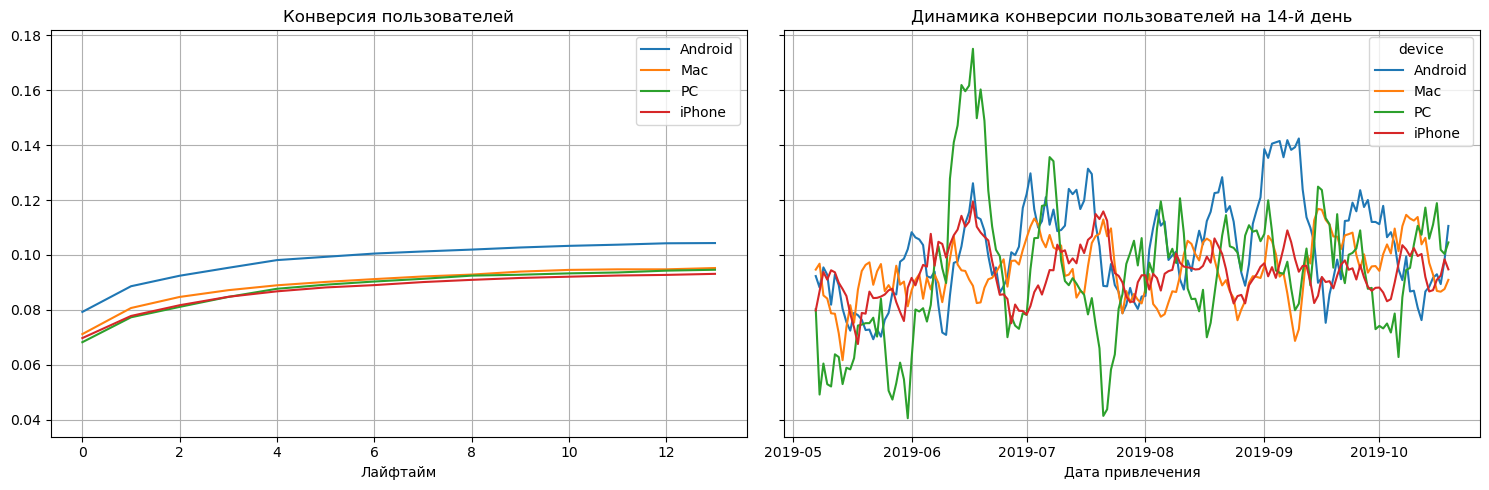

In [58]:
# анализ конверсии по устройствам
dimensions=['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    usa_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия по всем устройствам примерно одинаковая, немного выше у Android.

### Выводы

По всем данным можно сдеалть следующие выводы:
- LTV подверженно сезонности;
- Стоимость привлечения пользователей растет;
- Убыточные рекламные компании начались с июня, что совпало с увеличением расходов на канал "TipTop";
- В целом реклама направленная на привлечение пользователей не окупается,
- Привлечение пользователей на IPhone и MAC обходится дороже всего, расходы на эти девайсы увеличивались, быстрее, чем на PC и Android,
- Инвестиции в рекламу в разрезе девайсов окупаются только для пользователей приходящих с PC;
- Заметно снижение динамики ROI для всех устройств;
- c июня стоимость привлечения пользователей из США начала резко увеличиваться, в то время как расходы на привлечение в других странах сократились.
- инвестиции в рекламу не окупились только в США;
- в середине июля и середине августа в Великобритании прошли давольно успешные рекламны компании, которые привлекли качественных пользователей;
- Динамика окупаемости рекламы в США снижалась. 
- Наименьшая конверсия у пользователей PC, конверсия у остальных девайсов схожа. Необходимо обратить внимание почему этот канал проседает, возможно это наша точка роста.

Основной рынок, приносящий наибольшее количество платящих клиентов, для нас США - 6 902 клиента (остальные страны принесли по 700 пользователей). Поэтому, хоть рекламная компания в этой стране была убыточна, необходимо разобраться с причинами и внести изменения. Основные каналы продвижения там TipTop и FaceBoom. 

Несмотря на то, что наилучшая конверсия у канала FаceBoom (конверсия - 12%, 32445 д.е. потрачено на рекламу, 3557 привлеченных платящих пользователей), деньги больше вкладывались в TipTop (конверсия - 9%, 54751 д.е. - потрачено на рекламу, 1878 привлеченных платящих пользователей), что расходовало наш бюджет неэффективно. 

Также стоит отметить, что, хоть привлечение клиента дешевле обходится на канале FaceBoom - 1,1 д.е. за пользователя, из-за того, что удержание клиентов из этого канала очень низкое - примерно 1%, канал не окупает вложения, впрочем как и TipTop. 

Наши предположения относительно отрицательного влияния девайсов на конверсию и удержание не подтвердились показатели схожи для всех устройств.

В рекламных компаниях, проводимых в США необходимо понять, почему пользователи, приходящие из FaceBoom плохо удерживаются. 

**Возможные причины:**
- изначально приходят не наши клиенты, необходимо попробовать изменить рекламные макеты(описание, фото и видеоролики) и аудиторию таргета;
- в рекламных объявлениях заявлено не то, что пользователь получает в итоге, и из-за этого уходит;
- проблемы с интерфейсом: он может быть непонятен или неудобен с первого раза;

**Рекомендации:**

Считаем, что стоит обратить внимание на рекламные компании для TipTop, что там такого особенного, что 21% привлеченных пользователей удерживается на 14-й день, почему они более лояльны. 

Кроме того, в качестве теста, следует попробовать расширить наше влияние на рынке других стран, т.к. они показывают неплохие результаты. Можно начать с перераспределения рекламного бюджета в пользу Великобритации, Франции и Германии в двукратном размере от изначального для рекламных площадок в этих странах.

Также стоит сократить рекламный бюджет на канал TipTop, т.к. он приносит меньше пользователей по сравнению с FaceBoom, в том числе платящих. Посмотреть, как канал TipTop продвигает наше приложение и почему затраты с июня начали резко увеличиваться, возможно проблемы в неправильной настройке.

**Способы повысить Retention:**

- понять, кто наши платящие клиенты и выбирать рекламную стратегию исходя из этой информации,
- упростить туториал на входе в приложение;
- напомнить о себе с помощью email-рассылок, рекламы, соцсетей (реатрибуция, ремаркетинг);
- ввести бонусы и подарки для пользователей, поддерживающие интерес к продукту;
- разделить путь пользователя на этапы и акцентировать его внимание на прохождение каждого из этапов, чтобы давать ему цели, к которым можно стремиться;
- добавить скрытый контент и другие возможности, которые постепенно открываются пользователям;
- добавить социальный аспект, возможность общаться с друзьями, следить за их действиями;
- добавить ежедневный контент (новые задания, фишки, бонусы) — чтобы люди заходили каждый день.